# BioAct-Het: Heterogeneous siamese neural network for bioactivity prediction using novel bioactivity representation

## Init

In [2]:
from google.colab import drive
try:
  drive.mount('/content/drive')
except:
  print('Drive not mounted. Are you sure you are not in a local runtime?')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir -p /content/drive/MyDrive/Colab\ Notebooks/pheno/BioAct-Het

In [4]:
%cd /content/drive/MyDrive/Colab\ Notebooks/pheno/BioAct-Het

/content/drive/MyDrive/Colab Notebooks/pheno/BioAct-Het


In [12]:
%cd BioAct-Het.colab

[Errno 2] No such file or directory: 'BioAct-Het.colab'
/home/jovyan/BioAct-Het.colab/BioAct-Het


## Install Libraries

In [ ]:
## If you don't have a GPU you must run this.

%pip install torch==2.2.1
%pip install torchdata==0.7.1

#!pip install dgl -f https://data.dgl.ai/wheels/repo.html
#!pip install dglgo -f https://data.dgl.ai/wheels-test/repo .html
#!pip install torch torchvision
#!pip install rdkit molvs dgllife

In [ ]:
%pip install  dgl -f https://data.dgl.ai/wheels/torch-2.2/cu121/repo.html

Looking in links: https://data.dgl.ai/wheels/torch-2.2/cu121/repo.html


In [ ]:
import dgl

In [33]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
#%%capture
## Run only if you're sure to use a GPU.
#!pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html
!pip install -U dgl -f https://data.dgl.ai/wheels/torch-2.3/cu121/repo.html
!pip install -U dglgo -f https://data.dgl.ai/wheels-test/repo.html
!pip install -U rdkit molvs dgllife

Looking in links: https://data.dgl.ai/wheels/torch-2.3/cu121/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.5/370.5 MB 2.9 MB/s eta 0:00:00
Looking in links: https://data.dgl.ai/wheels-test/repo.html
  Using cached dglgo-0.0.2-py3-none-any.whl.metadata (500 bytes)
  Using cached ogb-1.3.6-py3-none-any.whl.metadata (6.2 kB)
INFO: pip is looking at multiple versions of dglgo to determine which version is compatible with other requirements. This could take a while.


In [ ]:
%%capture
#!git clone https://github.com/ph-mehdi/BioAct-Het.git
#!rsync -av BioAct-Het/ ./ --exclude=.git
#!git clone https://github.com/joerg84/Graph_Powered_ML_Workshop.git
#!rsync -av Graph_Powered_ML_Workshop/ ./ --exclude=.git
#!sed -i "s/utils\.gcn_pre_trained/Utils\.gcn_pre_trained/g" Utils/general.py

In [ ]:
%pip install -U dglgo -f https://data.dgl.ai/wheels-test/repo.html
%pip install -U rdkit molvs dgllife

Looking in links: https://data.dgl.ai/wheels-test/repo.html
  Using cached dglgo-0.0.2-py3-none-any.whl.metadata (500 bytes)
  Using cached ogb-1.3.6-py3-none-any.whl.metadata (6.2 kB)
INFO: pip is looking at multiple versions of dglgo to determine which version is compatible with other requirements. This could take a while.


In [5]:
%pip install -U torch==2.4 torchvision==0.19
%pip install -U dgl==2.4.0 -f https://data.dgl.ai/wheels/torch-2.4/cu121/repo.html
%pip install -U dglgo -f https://data.dgl.ai/wheels-test/repo.html
%pip install -U rdkit molvs dgllife

Looking in links: https://data.dgl.ai/wheels/torch-2.4/cu121/repo.html
  Using cached https://data.dgl.ai/wheels/torch-2.4/cu121/dgl-2.4.0%2Bcu121-cp312-cp312-manylinux1_x86_64.whl (355.2 MB)
Looking in links: https://data.dgl.ai/wheels-test/repo.html
INFO: pip is looking at multiple versions of dglgo to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.1/118.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━

In [26]:
%pip install  dgl
%pip install -U dglgo -f https://data.dgl.ai/wheels-test/repo.html

Looking in links: https://data.dgl.ai/wheels-test/repo.html
  Using cached dglgo-0.0.2-py3-none-any.whl.metadata (500 bytes)
  Using cached ogb-1.3.6-py3-none-any.whl.metadata (6.2 kB)
INFO: pip is looking at multiple versions of dglgo to determine which version is compatible with other requirements. This could take a while.


## Load Libraries

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
!pip install opencv-python

In [6]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

import dgl
import sys
import torch
import random
import cv2
#import torchvision
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
from numpy import array
from numpy import argmax
from tensorflow.keras.utils import to_categorical
from dgllife.model import MLPPredictor
from dgllife.utils import smiles_to_bigraph, CanonicalAtomFeaturizer, AttentiveFPAtomFeaturizer
from tqdm.notebook import tqdm, trange
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import History, TensorBoard

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import pandas as pd
pd.set_option('display.max_columns', 500)

from molvs import standardize_smiles

from tqdm.auto import tqdm
tqdm.pandas()

from Utils.general import DATASET, get_dataset, separate_active_and_inactive_data, get_embedding_vector_class, count_lablel,data_generator, del_nan
from Utils.gcn_pre_trained import get_sider_model, get_tox21_model
#from Models.heterogeneous_siamese_sider import siamese_model_attentiveFp_sider, siamese_model_Canonical_sider

In [7]:
import random
import numpy as np

import tensorflow as tf
from keras.layers import Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from sklearn.metrics import matthews_corrcoef

#import tensorflow_addons as tfa

def siamese_model_attentiveFp_sider ():

    left_input = Input(shape=(1024,))
    right_input = Input(shape=(512,))

    model1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(1024,input_shape=(1024,),  activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),

    ])

    model2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512,input_shape=(512,),  activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
    ])

    encoded_l = model1(left_input)
    encoded_r = model2(right_input)

    L1 = tf.keras.layers.Lambda(lambda x: K.abs(x[0]-x[1]),output_shape=(128,))([encoded_l, encoded_r])

    L1_D = tf.keras.layers.Dropout(0.2)(L1)
    L2 = tf.keras.layers.Dense(64, activation='relu')(L1_D)
    L2_D = tf.keras.layers.Dropout(0.2)(L2)
    L3 = tf.keras.layers.Dense(32, activation='relu')(L2_D)
    L3_D = tf.keras.layers.Dropout(0.2)(L3)
    L4 = tf.keras.layers.Dense(16, activation='relu')(L3_D)
    L4_D = tf.keras.layers.Dropout(0.2)(L4)
    L5 = tf.keras.layers.Dense(8, activation='relu')(L4_D)

    prediction = tf.keras.layers.Dense(1, activation='sigmoid')(L5)

    siamese_net = tf.keras.Model([left_input, right_input], prediction)

    optimizer= Adam(learning_rate=0.001)
    siamese_net.compile(loss='binary_focal_crossentropy', optimizer=optimizer, metrics=[
        "accuracy", "mae", "mse",
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.F1Score(),
        lambda y_true, y_pred: matthews_corrcoef(y_true, tf.round(y_pred)),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.FalseNegatives(),
    ])

    optimizer = Adam(learning_rate = 0.001)
    model1.compile(loss="kl_divergence",optimizer=optimizer)
    model2.compile(loss="kl_divergence",optimizer=optimizer)

    return siamese_net

In [8]:
def create_dataset_with_gcn(dataset, class_embed_vector, GCN, tasks ):

    created_data = []
    data = np.arange(len(tasks))
    onehot_encoded = to_categorical(data)

    for i, data in enumerate(tqdm(dataset)):
        smiles, g, labels, mask = data
        g = g.to(device)
        g = dgl.add_self_loop(g)
        graph_feats = g.ndata.pop('h')
        embbed = GCN(g, graph_feats)
        embbed = embbed.to('cpu')
        embbed = embbed.detach().numpy()
        for j, label in enumerate(labels):
            if mask[j] == 1.0:
              a = (embbed, onehot_encoded[j], class_embed_vector[j], label, tasks[j])
              created_data.append(a)
    print('Data created!!')
    return created_data

# ADMET

## Data preprocessing

In [9]:
#df_path = "./drive/MyDrive/insilicodrug/insilicodrug_dataset_info.csv"
df_path = "/content/drive/MyDrive/insilicodrug/insilicodrug_dataset_info.csv"
df = pd.read_csv(df_path)[['task', 'show']]
df = df[df.show == 'yes']
tasks = df.task.to_list()
del df

In [11]:
cache_path='./insilicodriug_dglgraph.bin'
#df = pd.read_csv("./drive/MyDrive/insilicodrug/insilicodrug_dataset.csv")[['smiles', 'group'] + tasks]
df = pd.read_csv("/content/insilicodrug_dataset.csv")[['smiles', 'group'] + tasks]
#df = df.drop(columns = ['Eye irritation', 'Eye corrosion'])[df.drop(columns = ['Eye irritation', 'Eye corrosion', 'smiles', 'group']).any(axis = 1)]

cols = ['smiles', 'group'] + [col for col in df.columns if len(df[col].dropna().drop_duplicates()) == 2]
df = df[cols]
def standardize(smile):
  try:
    return standardize_smiles(smile)
  except:
    return None
df['smiles'] = df.smiles.progress_apply(standardize)
df = df[df.smiles.notna()]
df = df[~df.drop(columns = ['smiles','group']).isna().all(axis = 1)]
df.groupby(['smiles', 'group'], as_index = None).first()
tasks = df.columns.values[2:].tolist()

  0%|          | 0/96205 [00:00<?, ?it/s]

In [12]:
tasks

['Carcinogenicity',
 'Ames Mutagenicity',
 'Respiratory toxicity',
 'Eye irritation',
 'Eye corrosion',
 'pgp_in_balanced',
 'pgp_sub',
 'bbbp',
 'dili',
 't12_rat_liver_cat',
 't12_rat_plasma_cat',
 't12_human_liver_cat',
 't12_human_plasma_cat',
 'hia',
 'herg',
 'Hepatotoxicity',
 'CYP2C9_balanced',
 'CYP2D6_balanced',
 'CYP3A4_balanced',
 'CYP1A2_balanced',
 'CYP2C19_balanced',
 'Hepatotoxicity_clean',
 'rep_tox',
 'fdamdd2',
 'f20',
 'f30',
 'skin_disorder(ochem)',
 'rat_tox_bin']

In [13]:
from collections import Counter

one = []
zero = []

for task in tqdm(tasks):
  data = df[task].dropna()
  print(task ,":" ,Counter(data))
  zero.append(Counter(data)[0])
  one.append(Counter(data)[1])

  0%|          | 0/28 [00:00<?, ?it/s]

Carcinogenicity : Counter({0.0: 526, 1.0: 516})
Ames Mutagenicity : Counter({1.0: 4309, 0.0: 3361})
Respiratory toxicity : Counter({1.0: 844, 0.0: 555})
Eye irritation : Counter({1.0: 3874, 0.0: 1346})
Eye corrosion : Counter({0.0: 1412, 1.0: 886})
pgp_in_balanced : Counter({0.0: 441, 1.0: 435})
pgp_sub : Counter({1.0: 1556, 0.0: 917})
bbbp : Counter({1.0: 1201, 0.0: 866})
dili : Counter({1.0: 416, 0.0: 278})
t12_rat_liver_cat : Counter({0.0: 356, 1.0: 328})
t12_rat_plasma_cat : Counter({0.0: 694, 1.0: 557})
t12_human_liver_cat : Counter({0.0: 989, 1.0: 809})
t12_human_plasma_cat : Counter({0.0: 839, 1.0: 834})
hia : Counter({1.0: 808, 0.0: 152})
herg : Counter({1.0: 1552, 0.0: 1530})
Hepatotoxicity : Counter({1.0: 1749, 0.0: 1279})
CYP2C9_balanced : Counter({0.0: 2937, 1.0: 2593})
CYP2D6_balanced : Counter({0.0: 1885, 1.0: 1401})
CYP3A4_balanced : Counter({0.0: 3893, 1.0: 3586})
CYP1A2_balanced : Counter({0.0: 4361, 1.0: 3582})
CYP2C19_balanced : Counter({1.0: 4552, 0.0: 4244})
Hepato

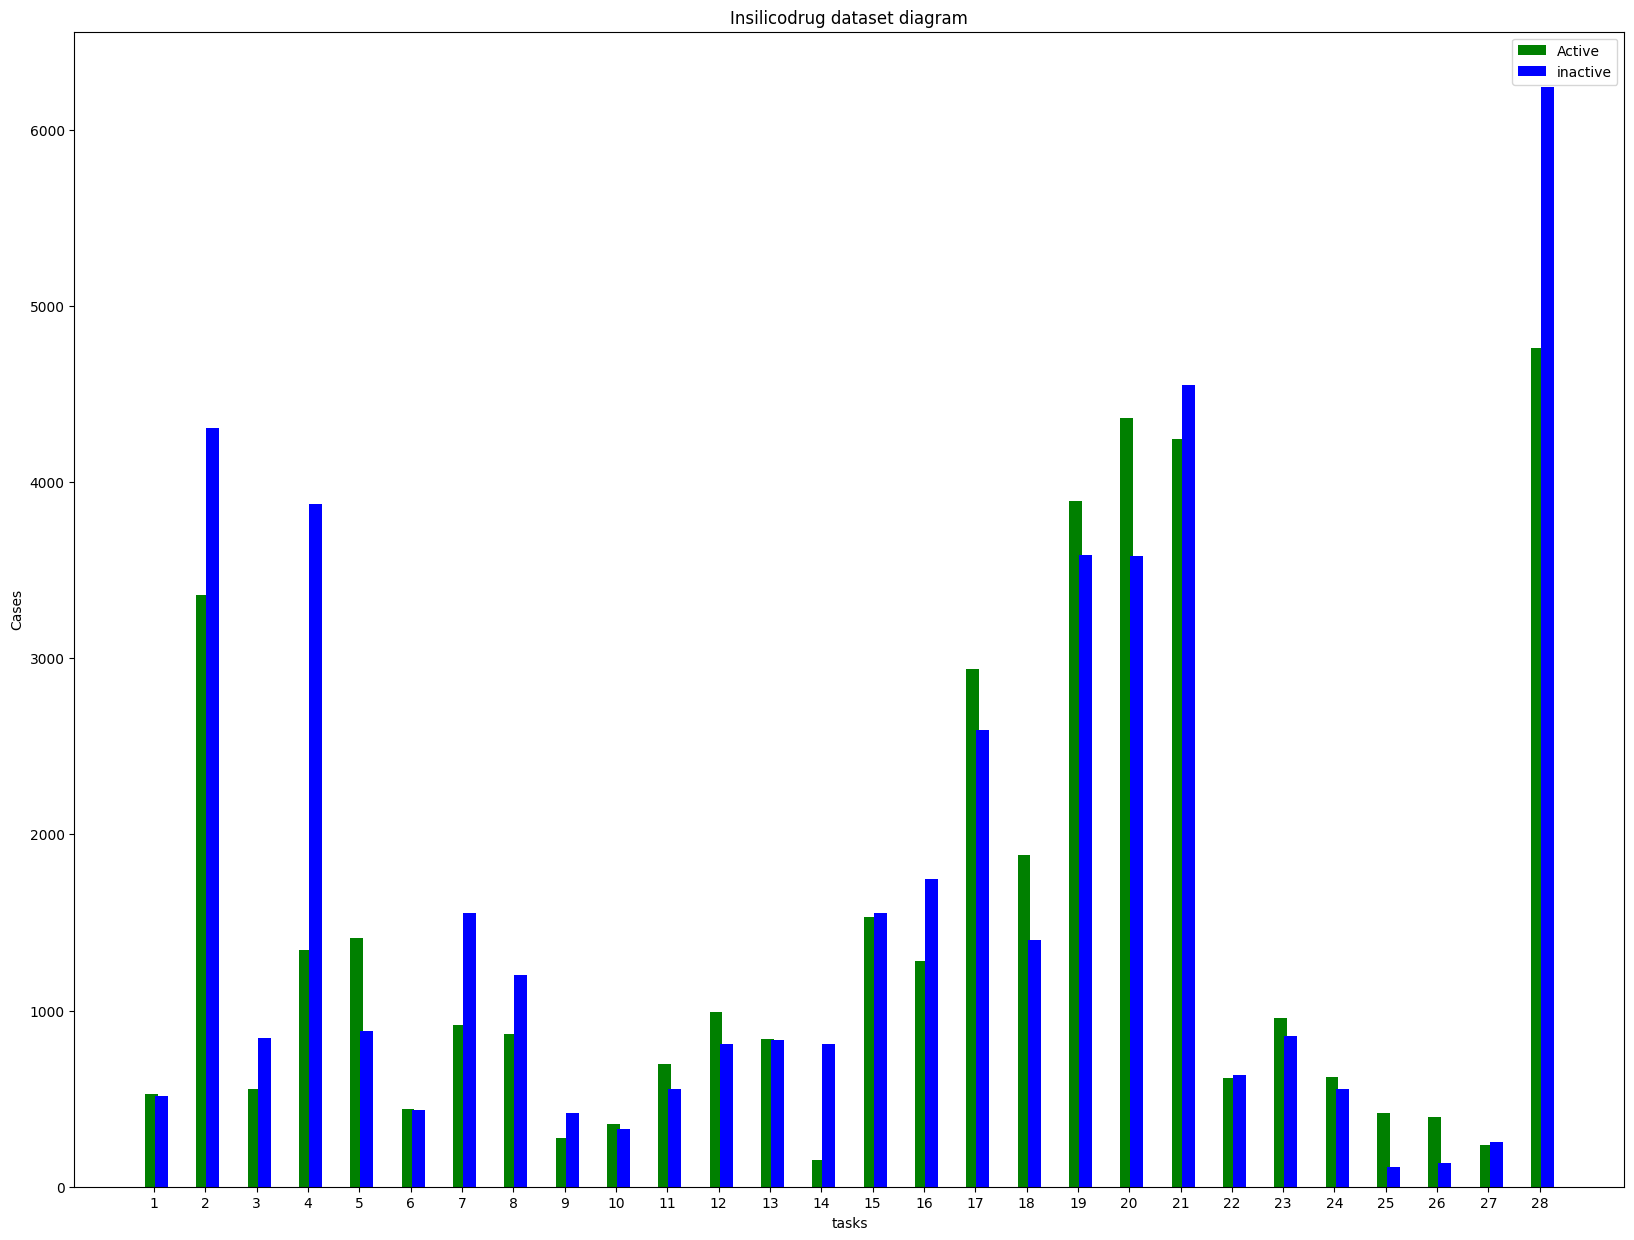

In [14]:
# Importing the matplotlib library
import numpy as np
import matplotlib.pyplot as plt
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[20, 15])
# Data to be plotted
X = np.arange(1,len(tasks)+1)

plt.bar(X + 0.20, zero, color = 'g', width = 0.25)
plt.bar(X + 0.4, one, color = 'b', width = 0.25)
# Creating the legend of the bars in the plot
plt.legend(['Active' , 'inactive' ])
# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(1,len(tasks) + 1)], X)
# Giving the tilte for the plot
plt.title("Insilicodrug dataset diagram")
# Namimg the x and y axis
plt.xlabel('tasks')
plt.ylabel('Cases')
# Saving the plot as a 'png'
plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

In [15]:
def create_dataset_with_gcn(dataset, class_embed_vector, GCN, tasks ):

    created_data = []
    data = np.arange(len(tasks))
    onehot_encoded = to_categorical(data)

    for i, data in enumerate(tqdm(dataset)):
        smiles, g, labels, mask = data
        g = g.to(device)
        g = dgl.add_self_loop(g)
        graph_feats = g.ndata.pop('h')
        embbed = GCN(g, graph_feats)
        embbed = embbed.to('cpu')
        embbed = embbed.detach().numpy()
        for j, label in enumerate(labels):
            if mask[j] == 1.0:
              a = (embbed, onehot_encoded[j], class_embed_vector[j], label, tasks[j])
              created_data.append(a)
    print('Data created!!')
    return created_data

## Training

In [16]:
total = df.drop(columns = ['smiles', 'group']).notna().sum().sum()
total

np.int64(86050)

In [27]:
model_name = 'GCN_attentivefp_SIDER'
gcn_model = get_sider_model(model_name)
gcn_model.eval()
gcn_model = gcn_model.to(device)

GCN_attentivefp_SIDER_pre_trained.pth:   0%|          | 0.00/3.09M [00:00<?, ?B/s]

Pretrained model loaded


/usr/local/lib/python3.12/dist-packages/dgllife/model/pretrain/__init__.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(local_pretrained_path, m

In [28]:
cla_cols = [col for col in df.columns[2:] if len(df[col].unique()) == 3]
col = cla_cols[0]
df_train = df[df.group == 'training'].drop(columns = ['group'])
df_valid = df[df.group != 'training'].drop(columns = ['group'])
idxs = list(range(0, len(df_valid)*len(tasks), len(tasks)))

In [29]:
%%capture
#Calculation of embedded vectors for each class
df_train_positive, df_train_negative = separate_active_and_inactive_data(df_train, tasks)
df_valid_positive, df_valid_negative = separate_active_and_inactive_data(df_valid, tasks)

dataset_positive_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_train_positive]
dataset_negative_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_train_negative]
dataset_positive_valid = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_valid_positive]
dataset_negative_valid = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_valid_negative]

embed_class_sider_train = get_embedding_vector_class(dataset_positive_train, dataset_negative_train, radius=2, size = 512)
embed_class_sider_valid = get_embedding_vector_class(dataset_positive_valid, dataset_negative_valid, radius=2, size = 512)

In [30]:
## Total samples
total1 = \
np.array([len(x) for x in df_valid_positive]).sum() + \
np.array([len(x) for x in df_valid_negative]).sum() + \
np.array([len(x) for x in df_train_positive]).sum() + \
np.array([len(x) for x in df_train_negative]).sum()


assert total == total1
total1

np.int64(86050)

In [31]:
total2 = \
np.array([len(x) for x in dataset_positive_valid]).sum() + \
np.array([len(x) for x in dataset_negative_valid]).sum() + \
np.array([len(x) for x in dataset_positive_train]).sum() + \
np.array([len(x) for x in dataset_negative_train]).sum()
assert total == total2
total2

np.int64(86050)

In [32]:
#create_dataset
train_dataset = DATASET(df_train, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path)
valid_dataset = DATASET(df_valid, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path)

train_ds = create_dataset_with_gcn(train_dataset, embed_class_sider_train, gcn_model, tasks)
valid_ds = create_dataset_with_gcn(valid_dataset, embed_class_sider_valid, gcn_model, tasks)

l_train, r_train, lbls_train, tasks_train = [], [], [], []
l_valid, r_valid, lbls_valid, tasks_valid = [], [], [], []

for i , (embbed_drug, onehot_task, embbed_task, lbl, task_name) in enumerate(train_ds):
    l_train.append(embbed_drug[0])
    r_train.append(embbed_task)
    lbls_train.append(lbl.tolist())
    tasks_train.append(task_name)

for i , (embbed_drug, onehot_task, embbed_task, lbl, task_name) in enumerate(valid_ds):
    l_valid.append(embbed_drug[0])
    r_valid.append(embbed_task)
    lbls_valid.append(lbl.tolist())
    tasks_valid.append(task_name)

del train_ds, valid_ds, df_train, df_valid

l_train = np.array(l_train, dtype='uint8').reshape(-1,1024,1)
r_train = np.array(r_train, dtype='uint8').reshape(-1, 512,1)
lbls_train = np.array(lbls_train)

l_valid = np.array(l_valid, dtype='uint8').reshape(-1,1024,1)
r_valid = np.array(r_valid, dtype='uint8').reshape(-1, 512,1)
lbls_valid = np.array(lbls_valid)

Processing dgl graphs from scratch...
Processing molecule 1000/44144
Processing molecule 2000/44144
Processing molecule 3000/44144
Processing molecule 4000/44144
Processing molecule 5000/44144
Processing molecule 6000/44144
Processing molecule 7000/44144
Processing molecule 8000/44144
Processing molecule 9000/44144
Processing molecule 10000/44144
Processing molecule 11000/44144
Processing molecule 12000/44144
Processing molecule 13000/44144
Processing molecule 14000/44144
Processing molecule 15000/44144
Processing molecule 16000/44144
Processing molecule 17000/44144
Processing molecule 18000/44144
Processing molecule 19000/44144
Processing molecule 20000/44144
Processing molecule 21000/44144
Processing molecule 22000/44144
Processing molecule 23000/44144
Processing molecule 24000/44144
Processing molecule 25000/44144
Processing molecule 26000/44144
Processing molecule 27000/44144
Processing molecule 28000/44144
Processing molecule 29000/44144
Processing molecule 30000/44144
Processing 

  0%|          | 0/44144 [00:00<?, ?it/s]

AttributeError: module 'dgl.backend' has no attribute 'ndim'

In [1]:
print(l_train.shape)
print(r_train.shape)
print(lbls_train.shape)

NameError: name 'l_train' is not defined

In [ ]:
lbls_train = np.expand_dims(lbls_train, axis=-1)
lbls_valid = np.expand_dims(lbls_valid, axis=-1)

In [ ]:
print(len(lbls_valid), lbls_valid.shape)
print(lbls_valid.sum())

16416 (16416, 1)
8318.0


In [ ]:
# create neural network model
model_path = f"models/test_{col}.keras"
siamese_net = siamese_model_attentiveFp_sider()
history = History()
tensorboatd = TensorBoard(log_dir='logs/fit', histogram_freq=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir logs/fit --port 5001

In [ ]:
!mkdir -p models
P = siamese_net.fit([l_train, r_train], lbls_train, epochs = 50, batch_size = 128, callbacks=[history])
siamese_net.save(model_path)

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
545/545 ━━━━━━━━━━━━━━━━━━━━ 163s 295ms/step - accuracy: 0.5076 - auc: 0.5059 - f1_score: 0.6863 - false_negatives: 7773.3848 - false_positives: 9445.6650 - lambda: 0.0059 - loss: 1.5427 - mae: 0.4968 - mse: 0.3210 - precision: 0.5306 - recall: 0.5672 - true_negatives: 7037.4321 - true_positives: 10750.8223
Epoch 2/50
545/545 ━━━━━━━━━━━━━━━━━━━━ 163s 298ms/step - accuracy: 0.5230 - auc: 0.5058 - f1_score: 0.6937 - false_negatives: 3671.0732 - false_positives: 12979.1104 - lambda: 0.0120 - loss: 0.1847 - mae: 0.4991 - mse: 0.2519 - precision: 0.5342 - recall: 0.7940 - true_negatives: 3451.3572 - true_positives: 14905.7637
Epoch 3/50
545/545 ━━━━━━━━━━━━━━━━━━━━ 163s 298ms/step - accuracy: 0.5368 - auc: 0.5236 - f1_score: 0.6947 - false_negatives: 3223.0989 - false_positives: 13048.3477 - lambda: 0.0422 - loss: 0.1757 - mae: 0.4983 - mse: 0.2494 - precision: 0.5425 - recall: 0.8267 - true_negatives: 3384.0256 - true_positives: 15351.8311
Epoch 4/50


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


545/545 ━━━━━━━━━━━━━━━━━━━━ 163s 299ms/step - accuracy: 0.5493 - auc: 0.5445 - f1_score: 0.6907 - false_negatives: 3620.6558 - false_positives: 12065.3916 - lambda: 0.0834 - loss: 0.1737 - mae: 0.4974 - mse: 0.2484 - precision: 0.5496 - recall: 0.8089 - true_negatives: 4450.4214 - true_positives: 14870.8350
Epoch 5/50


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


545/545 ━━━━━━━━━━━━━━━━━━━━ 163s 299ms/step - accuracy: 0.5639 - auc: 0.5713 - f1_score: 0.6915 - false_negatives: 3697.5989 - false_positives: 11400.8496 - lambda: 0.1171 - loss: 0.1719 - mae: 0.4954 - mse: 0.2466 - precision: 0.5608 - recall: 0.8120 - true_negatives: 5061.6172 - true_positives: 14847.2383
Epoch 6/50


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


545/545 ━━━━━━━━━━━━━━━━━━━━ 161s 296ms/step - accuracy: 0.5931 - auc: 0.6133 - f1_score: 0.6914 - false_negatives: 3712.6631 - false_positives: 10500.7969 - lambda: 0.1815 - loss: 0.1685 - mae: 0.4906 - mse: 0.2426 - precision: 0.5839 - recall: 0.7999 - true_negatives: 5992.1211 - true_positives: 14801.7236
Epoch 7/50


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


545/545 ━━━━━━━━━━━━━━━━━━━━ 162s 297ms/step - accuracy: 0.6095 - auc: 0.6395 - f1_score: 0.6907 - false_negatives: 3693.5879 - false_positives: 9933.2344 - lambda: 0.2169 - loss: 0.1664 - mae: 0.4856 - mse: 0.2390 - precision: 0.5970 - recall: 0.7994 - true_negatives: 6602.1538 - true_positives: 14778.3281
Epoch 8/50


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


545/545 ━━━━━━━━━━━━━━━━━━━━ 163s 298ms/step - accuracy: 0.6289 - auc: 0.6649 - f1_score: 0.6919 - false_negatives: 3569.6428 - false_positives: 9376.0459 - lambda: 0.2564 - loss: 0.1628 - mae: 0.4794 - mse: 0.2344 - precision: 0.6135 - recall: 0.8064 - true_negatives: 7109.5347 - true_positives: 14952.0811
Epoch 9/50
545/545 ━━━━━━━━━━━━━━━━━━━━ 160s 294ms/step - accuracy: 0.6404 - auc: 0.6813 - f1_score: 0.6923 - false_negatives: 3507.8096 - false_positives: 8991.3184 - lambda: 0.2813 - loss: 0.1610 - mae: 0.4754 - mse: 0.2315 - precision: 0.6248 - recall: 0.8032 - true_negatives: 7476.8589 - true_positives: 15031.3164
Epoch 10/50


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


545/545 ━━━━━━━━━━━━━━━━━━━━ 159s 292ms/step - accuracy: 0.6581 - auc: 0.7051 - f1_score: 0.6927 - false_negatives: 3178.0166 - false_positives: 8725.8896 - lambda: 0.3187 - loss: 0.1563 - mae: 0.4678 - mse: 0.2259 - precision: 0.6373 - recall: 0.8234 - true_negatives: 7736.6411 - true_positives: 15366.7568
Epoch 11/50
545/545 ━━━━━━━━━━━━━━━━━━━━ 158s 291ms/step - accuracy: 0.6731 - auc: 0.7254 - f1_score: 0.6923 - false_negatives: 2984.6228 - false_positives: 8397.1553 - lambda: 0.3520 - loss: 0.1528 - mae: 0.4604 - mse: 0.2206 - precision: 0.6473 - recall: 0.8407 - true_negatives: 8062.6211 - true_positives: 15562.9043
Epoch 12/50
545/545 ━━━━━━━━━━━━━━━━━━━━ 158s 291ms/step - accuracy: 0.6924 - auc: 0.7541 - f1_score: 0.6923 - false_negatives: 2973.9780 - false_positives: 7762.1318 - lambda: 0.3906 - loss: 0.1482 - mae: 0.4515 - mse: 0.2144 - precision: 0.6660 - recall: 0.8408 - true_negatives: 8698.1982 - true_positives: 15572.9961
Epoch 13/50
545/545 ━━━━━━━━━━━━━━━━━━━━ 159s 291

In [ ]:
 ## Evaluate by single tasks
scores = []
for task in tasks:
  r = np.array([r_valid[i] for i in range(len(tasks_valid)) if tasks_valid[i] == task ])
  l = np.array([l_valid[i] for i in range(len(tasks_valid)) if tasks_valid[i] == task ])
  v = np.array([lbls_valid[i] for i in range(len(tasks_valid)) if tasks_valid[i] == task ])
  score = siamese_net.evaluate([l,r], v, verbose=1)
  scores.append([task] + score)
df = pd.DataFrame(scores, columns = ['task', 'LOSS', 'ACC', 'MAE', 'MSE', 'AUC', 'Precision', 'Recall', 'F1', 'MCC', 'TP', 'TN', 'FP', 'FN'])#
df.to_csv('test_scores.csv', index = None)
df

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.3877 - auc: 0.5053 - f1_score: 0.7231 - false_negatives: 61.0000 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 6.6571 - mae: 0.6010 - mse: 0.5911 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 39.0000 - true_positives: 0.0000e+00


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.4182 - auc: 0.5041 - f1_score: 0.7279 - false_negatives: 474.6087 - false_positives: 1.5217 - lambda: -0.0120 - loss: 7.2145 - mae: 0.5798 - mse: 0.5774 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 274.5217 - true_positives: 0.0000e+00
1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.5625 - auc: 0.5411 - f1_score: 0.7925 - false_negatives: 5.0000 - false_positives: 9.0000 - lambda: -0.0647 - loss: 3.2188 - mae: 0.4211 - mse: 0.3987 - precision: 0.6400 - recall: 0.7619 - true_negatives: 2.0000 - true_positives: 16.0000

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.5550 - auc: 0.5613 - f1_score: 0.7540 - false_negatives: 23.5000 - false_positives: 52.2000 - lambda: -0.0136 - loss: 2.9933 - mae: 0.4424 - mse: 0.4070 - precision: 0.6048 - recall: 0.7636 - true_negatives: 16.2000 - true_positives: 79.1000


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.2979 - auc: 0.4940 - f1_score: 0.8315 - false_negatives: 389.5588 - false_positives: 0.5000 - lambda: 0.0162 - loss: 9.3971 - mae: 0.7066 - mse: 0.7027 - precision: 0.8873 - recall: 0.0158 - true_negatives: 163.7353 - true_positives: 4.5588
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.5000 - auc: 0.5000 - f1_score: 0.6154 - false_negatives: 16.0000 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 10.8149 - mae: 0.5000 - mse: 0.5000 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 16.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.5923 - auc: 0.5000 - f1_score: 0.5991 - false_negatives: 106.6875 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 8.3591 - mae: 0.4077 - mse: 0.4077 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 160.6875 - true_positives: 0.0000e+00
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.4375 - auc: 0.3333 - f1_score: 0.6939 - false_negatives: 17.0000 - false_positives: 1.0000 - lambda: -0.1912 - loss: 4.3780 - mae: 0.5636 - mse: 0.5417 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 14.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.4624 - auc: 0.4180 - f1_score: 0.6909 - false_negatives: 61.0000 - false_positives: 1.0000 - lambda: -0.0538 - loss: 4.4307 - mae: 0.5409 - mse: 0.5238 - precision: 0.2143 - recall: 0.0051 - true_negatives: 55.8571 - true_positives: 0.4286
 1/12 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.5625 - auc: 0.2571 - f1_score: 0.5778 - false_negatives: 13.0000 - false_positives: 1.0000 - lambda: -0.1486 - loss: 3.8010 - mae: 0.4711 - mse: 0.4389 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 18.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.4681 - auc: 0.4030 - f1_score: 0.6720 - false_negatives: 105.6923 - false_positives: 12.6154 - lambda: -0.0769 - loss: 4.4683 - mae: 0.5430 - mse: 0.5098 - precision: 0.3796 - recall: 0.0627 - true_negatives: 91.9231 - true_positives: 8.5385
 1/13 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.6875 - auc: 0.5000 - f1_score: 0.4545 - false_negatives: 10.0000 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 6.3203 - mae: 0.3125 - mse: 0.3125 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 22.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.6846 - auc: 0.4912 - f1_score: 0.3288 - false_negatives: 71.7857 - false_positives: 1.5000 - lambda: -0.0309 - loss: 6.8116 - mae: 0.3170 - mse: 0.3149 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 164.1429 - true_positives: 0.0000e+00
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.4688 - auc: 0.5312 - f1_score: 0.6667 - false_negatives: 16.0000 - false_positives: 1.0000 - lambda: -0.1796 - loss: 3.9360 - mae: 0.5230 - mse: 0.5140 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 15.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.4490 - auc: 0.4518 - f1_score: 0.6788 - false_negatives: 52.3333 - false_positives: 2.8333 - lambda: -0.1683 - loss: 4.4274 - mae: 0.5415 - mse: 0.5276 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 44.5000 - true_positives: 0.0000e+00
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.3750 - auc: 0.2713 - f1_score: 0.7451 - false_negatives: 18.0000 - false_positives: 2.0000 - lambda: -0.1705 - loss: 6.3307 - mae: 0.6470 - mse: 0.6236 - precision: 0.3333 - recall: 0.0526 - true_negatives: 11.0000 - true_positives: 1.0000

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.4714 - auc: 0.4255 - f1_score: 0.6882 - false_negatives: 45.1667 - false_positives: 4.3333 - lambda: -0.0384 - loss: 5.0573 - mae: 0.5389 - mse: 0.5150 - precision: 0.4511 - recall: 0.0763 - true_negatives: 43.3333 - true_positives: 3.8333


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.4959 - auc: 0.5045 - f1_score: 0.6689 - false_negatives: 68.1250 - false_positives: 0.2500 - lambda: 0.0456 - loss: 6.1225 - mae: 0.5064 - mse: 0.5017 - precision: 0.8125 - recall: 0.0235 - true_negatives: 69.2500 - true_positives: 1.8750


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.5301 - auc: 0.4763 - f1_score: 0.6283 - false_negatives: 94.5833 - false_positives: 0.0000e+00 - lambda: 0.0124 - loss: 5.6224 - mae: 0.4730 - mse: 0.4693 - precision: 0.5833 - recall: 0.0047 - true_negatives: 105.1667 - true_positives: 0.5833
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4375 - auc: 0.4286 - f1_score: 0.7200 - false_negatives: 18.0000 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 7.1350 - mae: 0.5760 - mse: 0.5661 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 14.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.5035 - auc: 0.4942 - f1_score: 0.6634 - false_negatives: 98.2500 - false_positives: 1.5833 - lambda: 0.0086 - loss: 5.6906 - mae: 0.4978 - mse: 0.4859 - precision: 0.5902 - recall: 0.0259 - true_negatives: 99.0833 - true_positives: 3.0833
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.1250 - auc: 0.5179 - f1_score: 0.8929 - false_negatives: 28.0000 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 9.7914 - mae: 0.8724 - mse: 0.8699 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 4.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.1605 - auc: 0.5221 - f1_score: 0.8789 - false_negatives: 111.6250 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 9.8771 - mae: 0.8363 - mse: 0.8330 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 22.6250 - true_positives: 0.0000e+00
 1/20 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.5938 - auc: 0.6289 - f1_score: 0.6667 - false_negatives: 12.0000 - false_positives: 1.0000 - lambda: 0.2582 - loss: 2.4378 - mae: 0.4118 - mse: 0.3729 - precision: 0.8000 - recall: 0.2500 - true_negatives: 15.0000 - true_positives: 4.0000

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.5490 - auc: 0.5761 - f1_score: 0.6396 - false_negatives: 139.6667 - false_positives: 20.0000 - lambda: 0.0770 - loss: 2.5140 - mae: 0.4486 - mse: 0.4118 - precision: 0.5698 - recall: 0.1588 - true_negatives: 164.9524 - true_positives: 23.6667
 1/16 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.6562 - auc: 0.4958 - f1_score: 0.4878 - false_negatives: 11.0000 - false_positives: 0.0000e+00 - lambda: 0.2319 - loss: 4.3314 - mae: 0.3603 - mse: 0.3455 - precision: 1.0000 - recall: 0.0833 - true_negatives: 20.0000 - true_positives: 1.0000

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.5444 - auc: 0.5067 - f1_score: 0.6126 - false_negatives: 130.8235 - false_positives: 5.5294 - lambda: 0.0040 - loss: 4.3462 - mae: 0.4555 - mse: 0.4380 - precision: 0.4644 - recall: 0.0424 - true_negatives: 145.4706 - true_positives: 4.0588
 1/35 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.6250 - auc: 0.5040 - f1_score: 0.5778 - false_negatives: 11.0000 - false_positives: 1.0000 - lambda: 0.1705 - loss: 3.3062 - mae: 0.3882 - mse: 0.3542 - precision: 0.6667 - recall: 0.1538 - true_negatives: 18.0000 - true_positives: 2.0000

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.5030 - auc: 0.5073 - f1_score: 0.6694 - false_negatives: 277.1667 - false_positives: 13.6944 - lambda: 0.0275 - loss: 4.0514 - mae: 0.4985 - mse: 0.4706 - precision: 0.6199 - recall: 0.0740 - true_negatives: 279.2500 - true_positives: 20.2222


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.4529 - auc: 0.4801 - f1_score: 0.5911 - false_negatives: 38.3182 - false_positives: 159.9545 - lambda: -0.0283 - loss: 3.2412 - mae: 0.5416 - mse: 0.5007 - precision: 0.4154 - recall: 0.7169 - true_negatives: 55.2727 - true_positives: 111.7273
 1/47 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.6875 - auc: 0.3523 - f1_score: 0.4762 - false_negatives: 10.0000 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 2.0280 - mae: 0.3348 - mse: 0.3059 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 22.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


19/47 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.5543 - auc: 0.4016 - f1_score: 0.6121 - false_negatives: 149.7895 - false_positives: 0.1579 - lambda: -2.8355e-04 - loss: 3.7999 - mae: 0.4546 - mse: 0.4392 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 170.0526 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


22/47 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.5621 - auc: 0.4037 - f1_score: 0.6045 - false_negatives: 164.8182 - false_positives: 0.2727 - lambda: -4.5467e-04 - loss: 3.7612 - mae: 0.4464 - mse: 0.4315 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 202.9091 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.5953 - auc: 0.4161 - f1_score: 0.5712 - false_negatives: 305.5417 - false_positives: 1.1458 - lambda: -0.0012 - loss: 3.5447 - mae: 0.4114 - mse: 0.3985 - precision: 0.1111 - recall: 6.9963e-04 - true_negatives: 475.9792 - true_positives: 0.3333
 1/50 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.6562 - auc: 0.5714 - f1_score: 0.5116 - false_negatives: 11.0000 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 2.4542 - mae: 0.3430 - mse: 0.3408 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 21.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.5672 - auc: 0.5205 - f1_score: 0.6040 - false_negatives: 348.4118 - false_positives: 4.9804 - lambda: 0.0119 - loss: 3.5630 - mae: 0.4320 - mse: 0.4243 - precision: 0.5087 - recall: 0.0118 - true_negatives: 473.3137 - true_positives: 4.2353
 1/55 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.5938 - auc: 0.2368 - f1_score: 0.5778 - false_negatives: 13.0000 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 3.5764 - mae: 0.4449 - mse: 0.4086 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 19.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.4277 - auc: 0.4589 - f1_score: 0.7281 - false_negatives: 482.7321 - false_positives: 1.0893 - lambda: 0.0385 - loss: 4.4991 - mae: 0.5772 - mse: 0.5578 - precision: 0.8989 - recall: 0.0182 - true_negatives: 419.0714 - true_positives: 8.5357
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.4688 - auc: 0.3421 - f1_score: 0.5778 - false_negatives: 12.0000 - false_positives: 5.0000 - lambda: -0.2343 - loss: 3.8031 - mae: 0.5391 - mse: 0.4840 - precision: 0.1667 - recall: 0.0769 - true_negatives: 14.0000 - true_positives: 1.0000

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.5057 - auc: 0.4867 - f1_score: 0.6235 - false_negatives: 70.5556 - false_positives: 6.3333 - lambda: -0.0607 - loss: 3.9498 - mae: 0.4916 - mse: 0.4617 - precision: 0.3243 - recall: 0.0488 - true_negatives: 73.8889 - true_positives: 3.4444
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.7500 - auc: 0.5000 - f1_score: 0.4000 - false_negatives: 8.0000 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 2.7247 - mae: 0.2503 - mse: 0.2498 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 24.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.5338 - auc: 0.5013 - f1_score: 0.6212 - false_negatives: 99.8333 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 5.1867 - mae: 0.4636 - mse: 0.4587 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 103.8333 - true_positives: 0.0000e+00


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.5394 - auc: 0.4564 - f1_score: 0.5931 - false_negatives: 60.5556 - false_positives: 7.2222 - lambda: -0.0526 - loss: 4.7910 - mae: 0.4511 - mse: 0.4276 - precision: 0.3386 - recall: 0.0590 - true_negatives: 80.1111 - true_positives: 3.8889
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6562 - auc: 0.4948 - f1_score: 0.4103 - false_negatives: 5.0000 - false_positives: 6.0000 - lambda: 0.1204 - loss: 1.8076 - mae: 0.3595 - mse: 0.3020 - precision: 0.3333 - recall: 0.3750 - true_negatives: 18.0000 - true_positives: 3.0000

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.5979 - auc: 0.4524 - f1_score: 0.3930 - false_negatives: 13.6000 - false_positives: 19.6000 - lambda: -0.0437 - loss: 2.0706 - mae: 0.3811 - mse: 0.3253 - precision: 0.2299 - recall: 0.2920 - true_negatives: 42.4000 - true_positives: 5.2000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6875 - auc: 0.5000 - f1_score: 0.4000 - false_negatives: 10.0000 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 5.2331 - mae: 0.3126 - mse: 0.3125 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 22.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.7204 - auc: 0.4974 - f1_score: 0.3785 - false_negatives: 22.0000 - false_positives: 0.0000e+00 - lambda: 0.0000e+00 - loss: 5.0724 - mae: 0.2804 - mse: 0.2797 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 58.8000 - true_positives: 0.0000e+00
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.4375 - auc: 0.5040 - f1_score: 0.6383 - false_negatives: 17.0000 - false_positives: 1.0000 - lambda: -0.0325 - loss: 7.5014 - mae: 0.5756 - mse: 0.5647 - precision: 0.5000 - recall: 0.0556 - true_negatives: 13.0000 - true_positives: 1.0000

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.4673 - auc: 0.4979 - f1_score: 0.6188 - false_negatives: 34.7500 - false_positives: 2.5000 - lambda: -0.0553 - loss: 6.6660 - mae: 0.5354 - mse: 0.5205 - precision: 0.3875 - recall: 0.0427 - true_negatives: 32.2500 - true_positives: 1.5000
 1/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.3750 - auc: 0.3961 - f1_score: 0.6939 - false_negatives: 17.0000 - false_positives: 3.0000 - lambda: -0.3424 - loss: 4.5115 - mae: 0.5660 - mse: 0.5130 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 12.0000 - true_positives: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.5199 - auc: 0.4935 - f1_score: 0.6221 - false_negatives: 469.3770 - false_positives: 14.3443 - lambda: -0.0202 - loss: 4.7875 - mae: 0.4757 - mse: 0.4533 - precision: 0.3802 - recall: 0.0215 - true_negatives: 496.9180 - true_positives: 10.3115


,task,LOSS,ACC,MAE,MSE,AUC,Precision,Recall,F1,MCC,TP,TN,FP,FN
0,Carcinogenicity,6.630174,0.385714,0.607157,0.599954,0.501615,0.000000,0.000000,0.733945,0.000000,0.0,54.0,0.0,86.0
1,Ames Mutagenicity,8.129935,0.316491,0.681111,0.678365,0.499710,0.000000,0.000000,0.810880,-0.008517,0.0,451.0,2.0,972.0
2,Respiratory toxicity,2.895404,0.562724,0.431045,0.396477,0.581393,0.599078,0.787879,0.743243,0.020684,130.0,27.0,87.0,35.0
3,Eye irritation,9.614767,0.262452,0.739643,0.737156,0.492334,0.833333,0.006460,0.847130,-0.001113,5.0,269.0,1.0,769.0
4,Eye corrosion,8.434055,0.588235,0.411769,0.411765,0.500000,0.000000,0.000000,0.592391,0.000000,0.0,270.0,0.0,189.0
5,pgp_in_balanced,4.213936,0.500000,0.504048,0.487915,0.456467,0.500000,0.011494,0.666667,0.006778,1.0,86.0,1.0,86.0
6,pgp_sub,4.010620,0.478142,0.530576,0.489707,0.420720,0.400000,0.087432,0.659341,-0.048048,16.0,159.0,24.0,167.0
7,bbbp,6.746749,0.693237,0.309145,0.306695,0.492318,0.000000,0.000000,0.308219,-0.020743,0.0,287.0,2.0,125.0
8,dili,4.508259,0.446043,0.544062,0.525067,0.413346,0.000000,0.000000,0.682464,-0.158203,0.0,62.0,4.0,73.0
9,t12_rat_liver_cat,4.607313,0.500000,0.506992,0.484574,0.481893,0.500000,0.076923,0.673575,0.014225,5.0,60.0,5.0,60.0


In [ ]:
[tasks] + scores

In [ ]:
scores = siamese_net.evaluate([l_train,r_train], lbls_train, verbose=1)
pd.DataFrame([tasks] + scores, columns = ['task', 'LOSS', 'ACC', 'MAE', 'MSE', 'AUC', 'Precision', 'Recall', 'F1', 'TP', 'TN', 'FP', 'FN'])

In [ ]:
pd.DataFrame(scores, columns = ['task', 'LOSS', 'ACC', 'MAE', 'MSE', 'AUC', 'Precision', 'Recall', 'F1', 'MCC', 'TP', 'TN', 'FP', 'FN'])

In [ ]:
 ## Evaluate by single tasks
scores = []
for task in tasks:
  r = np.array([r_train[i] for i in range(len(tasks_train)) if tasks_train[i] == task ])
  l = np.array([l_train[i] for i in range(len(tasks_train)) if tasks_train[i] == task ])
  v = np.array([lbls_train[i] for i in range(len(tasks_train)) if tasks_train[i] == task ])
  score = siamese_net.evaluate([l,r], v, verbose=1)
  scores.append([task] + score)

In [ ]:
df

## Evaluating model

In [25]:
from sklearn.model_selection import KFold as KFold
from tensorflow.keras.callbacks import History
import pandas as pd
Epoch_S = 10
from os.path import isfile

def evaluate_model(df, k = 5 , shuffle = False, tasks = tasks):
    model_dir = "insilicodrug/models/"
    scores =[]
    kf = KFold(n_splits=k, shuffle= shuffle, random_state=None)

    for i, (train_index, valid_index) in enumerate(kf.split(df)):
        if(isfile(model_dir + 'model_fold_' + str(i) + '_10.pth')):
          continue

        train = df.iloc[train_index]
        valid = df.iloc[valid_index]
        idxs = list(range(0, len(valid)*len(tasks), len(tasks)))

        #Calculation of embedded vectors for each class
        df_train_positive, df_train_negative = separate_active_and_inactive_data(train, tasks)
        df_valid_positive, df_valid_negative = separate_active_and_inactive_data(valid, tasks)

        dataset_positive_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_train_positive]
        dataset_negative_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_train_negative]
        dataset_positive_valid = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_valid_positive]
        dataset_negative_valid = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_valid_negative]

        embed_class_sider_train = get_embedding_vector_class(dataset_positive_train, dataset_negative_train, radius=2, size = 512)
        embed_class_sider_valid = get_embedding_vector_class(dataset_positive_valid, dataset_negative_valid, radius=2, size = 512)

        #create_dataset
        train_dataset = DATASET(train, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path)
        valid_dataset = DATASET(valid, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path)

        train_ds = create_dataset_with_gcn(train_dataset, embed_class_sider_train, gcn_model, tasks)
        valid_ds = create_dataset_with_gcn(valid_dataset, embed_class_sider_valid, gcn_model, tasks)

        l_train, r_train, lbls_train = [], [], []
        l_valid, r_valid, lbls_valid = [], [], []

        for i , (embbed_drug, onehot_task, embbed_task, lbl, task_name) in enumerate(train_ds):
            l_train.append(embbed_drug[0])
            r_train.append(embbed_task)
            lbls_train.append(lbl.tolist())

        for i , (embbed_drug, onehot_task, embbed_task, lbl, task_name) in enumerate(valid_ds):
            l_valid.append(embbed_drug[0])
            r_valid.append(embbed_task)
            lbls_valid.append(lbl.tolist())

        del train_ds, valid_ds, train, valid

        l_train = np.array(l_train, dtype='uint8').reshape(-1,1024,1)
        r_train = np.array(r_train, dtype='uint8').reshape(-1, 512,1)
        lbls_train = np.array(lbls_train)

        l_valid = np.array(l_valid, dtype='uint8').reshape(-1,1024,1)
        r_valid = np.array(r_valid, dtype='uint8').reshape(-1, 512,1)
        lbls_valid = np.array(lbls_valid)

        # create neural network model
        siamese_net = siamese_model_attentiveFp_sider()
        history = History()
        tensorboatd = TensorBoard(log_dir='logs/fit', histogram_freq=1)
        P = siamese_net.fit([l_train, r_train], lbls_train, epochs = Epoch_S, batch_size = 128, callbacks=[history])

        ## Evaluate by single tasks
        for i in range(len(tasks)):
            r = np.array([r_valid[i+j] for j in idxs])
            l = np.array([l_valid[i+j] for j in idxs])
            v = np.array([lbls_valid[i+j] for j in idxs])
            score = siamese_net.evaluate([l,r], v, verbose=1)
            scores.append([tasks[i]] + score)
        pd.DataFrame(scores).to_csv('scores.csv', index = None)
        siamese_net.save(model_dir + 'model_fold_' + str(i) + '_10.pth')
    return scores

scores = evaluate_model(df.drop(columns = ['group']), 10, False, tasks)

Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/3841
Processing molecule 2000/3841
Processing molecule 3000/3841
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/3366
Processing molecule 2000/3366
Processing molecule 3000/3366
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1420
Processing dgl graphs from scratch...
Processing molecule 1000/1004
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1451
Processing dgl graphs from scratch...
Processing molecule 1000/1560
Processing dgl graphs from scratch...
Processing molecule 1000/2441
Processing molecule 2000

ValueError: could not convert string to float: 'training'

In [26]:
df = df.drop(columns = ['group'])

In [ ]:
pd.DataFrame(result, columns = ['LOSS', 'ACC', 'MAE', 'MSE', 'AUC', 'Precision', 'Recall', 'F1', 'MCC', 'TP', 'TN', 'FP', 'FN']).to_csv('biacthet_insilico_result.csv', index = None)

# Sider

In [ ]:
from sklearn.model_selection import KFold

def evaluate_model(df, tasks, k = 10 , shuffle = False, Epoch_S = 10):
    result =[]

    kf = KFold(n_splits=k, shuffle= shuffle, random_state=None)

    for train_index, test_index in kf.split(df):

        df_train = df.iloc[train_index]
        df_valid =  df.iloc[test_index]

        #Calculation of embedded vectors for each class
        df_train_positive, df_train_negative = separate_active_and_inactive_data(df_train, tasks)
        df_test_positive, df_test_negative = separate_active_and_inactive_data(df_valid, tasks)

        dataset_positive_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_train_positive]
        dataset_negative_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_train_negative]
        dataset_positive_test = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_test_positive]
        dataset_negative_test = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_test_negative]

        embed_class_sider_train = get_embedding_vector_class(dataset_positive_train, dataset_negative_train, radius=2, size = 512)
        embed_class_sider_valid = get_embedding_vector_class(dataset_positive_test, dataset_negative_test, radius=2, size = 512)

        #create_dataset
        train_dataset = DATASET(df_train, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path)
        valid_dataset = DATASET(df_valid, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path)

        train_ds = create_dataset_with_gcn(train_dataset, embed_class_sider_train, gcn_model, tasks)
        valid_ds = create_dataset_with_gcn(valid_dataset, embed_class_sider_valid, gcn_model, tasks)

        l_train, r_train, lbls_train, tasks_train = [], [], [], []
        l_valid, r_valid, lbls_valid, tasks_valid = [], [], [], []

        for i , (embbed_drug, onehot_task, embbed_task, lbl, task_name) in enumerate(train_ds):
            l_train.append(embbed_drug[0])
            r_train.append(embbed_task)
            lbls_train.append(lbl.tolist())
            tasks_train.append(task_name)

        for i , (embbed_drug, onehot_task, embbed_task, lbl, task_name) in enumerate(valid_ds):
            l_valid.append(embbed_drug[0])
            r_valid.append(embbed_task)
            lbls_valid.append(lbl.tolist())
            tasks_valid.append(task_name)

        del train_ds, valid_ds, df_train, df_valid

        l_train = np.array(l_train, dtype='uint8').reshape(-1,1024,1)
        r_train = np.array(r_train, dtype='uint8').reshape(-1, 512,1)
        lbls_train = np.array(lbls_train)

        l_valid = np.array(l_valid, dtype='uint8').reshape(-1,1024,1)
        r_valid = np.array(r_valid, dtype='uint8').reshape(-1, 512,1)
        lbls_valid = np.array(lbls_valid)

        lbls_train = np.expand_dims(lbls_train, axis=-1)
        lbls_valid = np.expand_dims(lbls_valid, axis=-1)

        # create neural network model
        siamese_net = siamese_model_attentiveFp_sider()
        history = History()
        P = siamese_net.fit([l_train, r_train], lbls_train, epochs = Epoch_S, batch_size = 128, callbacks=[history])
        score  = siamese_net.evaluate([l_valid,r_valid],lbls_valid, verbose=1)
        result.append(score)

    return result

def create_dataset_with_gcn(dataset, class_embed_vector, GCN, tasks ):

    created_data = []
    data = np.arange(len(tasks))
    onehot_encoded = to_categorical(data)

    for i, data in enumerate(tqdm(dataset)):
        smiles, g, labels, mask = data
        g = g.to(device)
        g = dgl.add_self_loop(g)
        graph_feats = g.ndata.pop('h')
        embbed = GCN(g, graph_feats)
        embbed = embbed.to('cpu')
        embbed = embbed.detach().numpy()
        for j, label in enumerate(labels):
            if mask[j] == 1.0:
              a = (embbed, onehot_encoded[j], class_embed_vector[j], label, tasks[j])
              created_data.append(a)
    print('Data created!!')
    return created_data

In [ ]:
cache_path='./sider_dglgraph.bin'

df = get_dataset("sider")
tasks = df.columns.values[1:].tolist()

model_name = 'GCN_attentivefp_SIDER'
gcn_model = get_sider_model(model_name)
gcn_model.eval()
gcn_model = gcn_model.to(device)

scores = evaluate_model(df, tasks, 5, False)

pd.DataFrame(scores, columns = ['LOSS', 'ACC', 'MAE', 'MSE', 'AUC', 'Precision', 'Recall', 'F1', 'MCC', 'TP', 'TN', 'FP', 'FN']).to_csv('biocathet_sider_results.tsv', sep = '\t', index = None)

Extracting file to /home/jovyan/.dgl/sider


GCN_attentivefp_SIDER_pre_trained.pth:   0%|          | 0.00/3.09M [00:00<?, ?B/s]

/opt/conda/lib/python3.12/site-packages/dgllife/model/pretrain/__init__.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(local_pretrained_path, m

Pretrained model loaded
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1046
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1046
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1058
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing d

  0%|          | 0/1141 [00:00<?, ?it/s]

Data created!!


  0%|          | 0/286 [00:00<?, ?it/s]

Data created!!
Epoch 1/10


/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


241/241 ━━━━━━━━━━━━━━━━━━━━ 33s 137ms/step - accuracy: 0.5282 - auc_35: 0.5381 - f1_score: 0.7331 - false_negatives_14: 4075.4504 - false_positives_14: 3162.8635 - lambda: 0.0532 - loss: 1.9849 - mae: 0.4814 - mse: 0.3373 - precision_15: 0.6039 - recall_15: 0.5361 - true_negatives_14: 3399.5166 - true_positives_14: 4913.3018
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 33s 137ms/step - accuracy: 0.6041 - auc_35: 0.5877 - f1_score: 0.7352 - false_negatives_14: 2024.4669 - false_positives_14: 4050.0413 - lambda: 0.1629 - loss: 0.1956 - mae: 0.4744 - mse: 0.2390 - precision_15: 0.6325 - recall_15: 0.7579 - true_negatives_14: 2482.7107 - true_positives_14: 6993.9131
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 33s 136ms/step - accuracy: 0.6557 - auc_35: 0.6476 - f1_score: 0.7303 - false_negatives_14: 1108.8430 - false_positives_14: 4177.0332 - lambda: 0.2770 - loss: 0.1681 - mae: 0.4637 - mse: 0.2272 - precision_15: 0.6500 - recall_15: 0.8688 - true_negatives_14: 2410.7107 - true_positives_14: 7854

/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.5359 - auc_35: 0.5986 - f1_score: 0.6876 - false_negatives_14: 58.7942 - false_positives_14: 1748.5021 - lambda: 0.0172 - loss: 0.1801 - mae: 0.4905 - mse: 0.2463 - precision_15: 0.5311 - recall_15: 0.9758 - true_negatives_14: 104.4733 - true_positives_14: 1991.9177
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1039
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1029
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processi

  0%|          | 0/1141 [00:00<?, ?it/s]

Data created!!


  0%|          | 0/286 [00:00<?, ?it/s]

Data created!!
Epoch 1/10


/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


241/241 ━━━━━━━━━━━━━━━━━━━━ 35s 142ms/step - accuracy: 0.5622 - auc_36: 0.5320 - f1_score: 0.7104 - false_negatives_15: 1221.9091 - false_positives_15: 5515.3887 - lambda: 0.0689 - loss: 2.4303 - mae: 0.4854 - mse: 0.3126 - precision_16: 0.5837 - recall_16: 0.7954 - true_negatives_15: 1249.3595 - true_positives_15: 7564.4751
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 141ms/step - accuracy: 0.5666 - auc_36: 0.5150 - f1_score: 0.7229 - false_negatives_15: 247.1653 - false_positives_15: 6503.1196 - lambda: 0.0290 - loss: 0.2331 - mae: 0.4930 - mse: 0.2520 - precision_16: 0.5684 - recall_16: 0.9702 - true_negatives_15: 259.3760 - true_positives_15: 8541.4707
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 142ms/step - accuracy: 0.5639 - auc_36: 0.5087 - f1_score: 0.7213 - false_negatives_15: 145.7851 - false_positives_15: 6639.7563 - lambda: 0.0174 - loss: 0.1894 - mae: 0.4952 - mse: 0.2489 - precision_16: 0.5652 - recall_16: 0.9828 - true_negatives_15: 148.9876 - true_positives_15: 8616.603

/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.5711 - auc_36: 0.5000 - f1_score: 0.7266 - false_negatives_15: 0.0000e+00 - false_positives_15: 1686.1975 - lambda: 0.0000e+00 - loss: 0.1710 - mae: 0.4965 - mse: 0.2471 - precision_16: 0.5711 - recall_16: 1.0000 - true_negatives_15: 0.0000e+00 - true_positives_15: 2217.4897
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1034
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1030
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...

  0%|          | 0/1142 [00:00<?, ?it/s]

Data created!!


  0%|          | 0/285 [00:00<?, ?it/s]

Data created!!
Epoch 1/10


/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 140ms/step - accuracy: 0.5001 - auc_37: 0.5548 - f1_score: 0.7143 - false_negatives_16: 5249.0659 - false_positives_16: 2239.2397 - lambda: 0.0448 - loss: 1.8169 - mae: 0.5016 - mse: 0.3462 - precision_17: 0.5861 - recall_17: 0.3289 - true_negatives_16: 4552.8057 - true_positives_16: 3510.2439
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 139ms/step - accuracy: 0.6231 - auc_37: 0.6447 - f1_score: 0.7208 - false_negatives_16: 2280.8555 - false_positives_16: 3444.6902 - lambda: 0.2241 - loss: 0.1753 - mae: 0.4674 - mse: 0.2320 - precision_17: 0.6486 - recall_17: 0.7207 - true_negatives_16: 3375.8306 - true_positives_16: 6449.9795
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 140ms/step - accuracy: 0.6829 - auc_37: 0.6905 - f1_score: 0.7205 - false_negatives_16: 1221.6240 - false_positives_16: 3651.8472 - lambda: 0.3498 - loss: 0.1583 - mae: 0.4598 - mse: 0.2227 - precision_17: 0.6707 - recall_17: 0.8580 - true_negatives_16: 3151.8430 - true_positives_16: 7526

/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


241/241 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.6088 - auc_37: 0.4299 - f1_score: 0.7493 - false_negatives_16: 119.0000 - false_positives_16: 1409.0496 - lambda: 0.0721 - loss: 0.8250 - mae: 0.4878 - mse: 0.3062 - precision_17: 0.6117 - recall_17: 0.9514 - true_negatives_16: 151.8595 - true_positives_16: 2207.8181
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1030
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1031
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Process

  0%|          | 0/1142 [00:00<?, ?it/s]

Data created!!


  0%|          | 0/285 [00:00<?, ?it/s]

Data created!!
Epoch 1/10


/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 140ms/step - accuracy: 0.5342 - auc_38: 0.5626 - f1_score: 0.7017 - false_negatives_17: 4310.1816 - false_positives_17: 2799.5083 - lambda: 0.0853 - loss: 4.0261 - mae: 0.4761 - mse: 0.3474 - precision_18: 0.6076 - recall_18: 0.4703 - true_negatives_17: 4015.7356 - true_positives_17: 4425.9297
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 141ms/step - accuracy: 0.6319 - auc_38: 0.6248 - f1_score: 0.7213 - false_negatives_17: 1766.0372 - false_positives_17: 3844.0537 - lambda: 0.2378 - loss: 0.2148 - mae: 0.4684 - mse: 0.2390 - precision_18: 0.6406 - recall_18: 0.7844 - true_negatives_17: 2937.7065 - true_positives_17: 7003.5576
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 140ms/step - accuracy: 0.6630 - auc_38: 0.6528 - f1_score: 0.7225 - false_negatives_17: 1257.4546 - false_positives_17: 3953.6819 - lambda: 0.3041 - loss: 0.1785 - mae: 0.4629 - mse: 0.2286 - precision_18: 0.6545 - recall_18: 0.8508 - true_negatives_17: 2828.7852 - true_positives_17: 7511

/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


241/241 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.6498 - auc_38: 0.7150 - f1_score: 0.7365 - false_negatives_17: 16.3678 - false_positives_17: 1344.4463 - lambda: 0.3303 - loss: 0.1563 - mae: 0.4782 - mse: 0.2313 - precision_18: 0.6259 - recall_18: 0.9929 - true_negatives_17: 275.5868 - true_positives_17: 2251.3264
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1043
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1032
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processi

  0%|          | 0/1142 [00:00<?, ?it/s]

Data created!!


  0%|          | 0/285 [00:00<?, ?it/s]

Data created!!
Epoch 1/10


/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 140ms/step - accuracy: 0.5472 - auc_39: 0.5545 - f1_score: 0.7300 - false_negatives_18: 3726.3555 - false_positives_18: 3214.7976 - lambda: 0.0814 - loss: 1.1387 - mae: 0.4697 - mse: 0.3091 - precision_19: 0.6108 - recall_19: 0.5841 - true_negatives_18: 3432.3306 - true_positives_18: 5177.8721
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 140ms/step - accuracy: 0.6365 - auc_39: 0.6174 - f1_score: 0.7249 - false_negatives_18: 1697.9835 - false_positives_18: 3863.3635 - lambda: 0.2444 - loss: 0.1827 - mae: 0.4813 - mse: 0.2389 - precision_19: 0.6452 - recall_19: 0.8004 - true_negatives_18: 2824.5208 - true_positives_18: 7165.4878
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 139ms/step - accuracy: 0.6824 - auc_39: 0.6580 - f1_score: 0.7265 - false_negatives_18: 898.0082 - false_positives_18: 3970.3389 - lambda: 0.3453 - loss: 0.1630 - mae: 0.4700 - mse: 0.2286 - precision_19: 0.6648 - recall_19: 0.8928 - true_negatives_18: 2663.7603 - true_positives_18: 8019.

/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


241/241 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.5843 - auc_39: 0.6837 - f1_score: 0.7096 - false_negatives_18: 57.0868 - false_positives_18: 1565.3141 - lambda: 0.0486 - loss: 0.1751 - mae: 0.4786 - mse: 0.2375 - precision_19: 0.5709 - recall_19: 0.9689 - true_negatives_18: 150.2149 - true_positives_18: 2115.1116


In [ ]:
pd.read_csv('biocathet_sider_results.tsv', sep ='\t')

,LOSS,ACC,MAE,MSE,AUC,Precision,Recall,F1,MCC,TP,TN,FP,FN
0,0.179494,0.544160,0.490064,0.245846,0.591021,0.538639,0.971394,0.692516,0.021515,3973.0,229.0,3403.0,117.0
1,0.170521,0.579772,0.496044,0.246659,0.500000,0.579772,1.000000,0.733995,0.000000,4477.0,0.0,3245.0,0.0
2,0.827245,0.599350,0.489882,0.308421,0.435829,0.601817,0.948458,0.742133,0.067097,4306.0,306.0,2849.0,234.0
3,0.155992,0.657570,0.477883,0.230974,0.706205,0.634523,0.992306,0.743058,0.343754,4514.0,546.0,2600.0,35.0
4,0.178177,0.570630,0.481365,0.240109,0.667740,0.561920,0.978158,0.707483,0.063358,4120.0,271.0,3212.0,92.0


In [ ]:
pd.concat([pd.DataFrame(df).T for df in [insilico, sider, tox21]])

,LOSS,ACC,MAE,MSE,AUC,Precision,Recall,F1,TP,TN,FP,FN,MCC
0,0.195081,0.664100,0.422520,0.211374,0.705680,0.665418,0.557007,0.652849,186.714286,213.071429,76.142857,110.357143,NaN
0,0.302286,0.590296,0.487048,0.254402,0.580159,0.583334,0.978063,0.723837,4278.000000,270.400000,3061.800000,95.600000,0.099145
0,0.055662,0.926552,0.267603,0.088210,0.847899,0.773281,0.035845,0.139964,42.000000,14387.400000,13.800000,1129.600000,0.041018


In [21]:
pd.read_csv('test_scores.csv').MCC.mean()

np.float64(-0.011510580564000908)

# Tox21

In [ ]:
cache_path='./tox21_dglgraph.bin'

df = get_dataset("tox21")
df = df.drop(columns = ['mol_id'])
tasks = df.columns.values[:-1].tolist()

model_name = 'GCN_attentivefp_Tox21'
gcn_model = get_tox21_model(model_name)
gcn_model.eval()
gcn_model = gcn_model.to(device)

#scores = evaluate_model(df, tasks, 10, False)

GCN_attentivefp_Tox21_pre_trained.pth:   0%|          | 0.00/1.95M [00:00<?, ?B/s]

Pretrained model loaded


/opt/conda/lib/python3.12/site-packages/dgllife/model/pretrain/__init__.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(local_pretrained_path, m

In [ ]:
round([0.59, 0.2])

TypeError: type list doesn't define __round__ method

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import matthews_corrcoef


def create_dataset_with_gcn(ds, class_embed_vector, GCN, tasks):
    created_data = []
    data = np.arange(len(tasks))
    onehot_encoded = to_categorical(data)

    for numberTask, dataset in enumerate(ds):
        for i, data in enumerate(dataset):
            smiles, g, label, mask = data
            g = g.to(device)
            g = dgl.add_self_loop(g)
            graph_feats = g.ndata.pop('h')
            embbed = GCN(g, graph_feats)
            embbed = embbed.to('cpu')
            embbed = embbed.detach().numpy()
            a = ( embbed, onehot_encoded[numberTask], class_embed_vector[numberTask], label, tasks[numberTask])
            created_data.append(a)
    print('Data created!!')
    return created_data

def siamese_model_attentiveFp_tox21 (lr_1 = 0.001 , lr_2 = 0.001):

    left_input = tf.keras.layers.Input(shape=(512,))
    right_input = tf.keras.layers.Input(shape=(512,))

    model1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512,input_shape=(512,),  activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
    ])

    model2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512,input_shape=(512,),  activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
    ])

    encoded_l = model1(left_input)
    encoded_r = model2(right_input)

    L1 = tf.keras.layers.Lambda (lambda x: tf.keras.backend.abs(x[0]-x[1]))([encoded_l, encoded_r])

    L1_D = tf.keras.layers.Dropout(0.3)(L1)
    L2 = tf.keras.layers.Dense(64, activation='relu')(L1_D)
    L2_D = tf.keras.layers.Dropout(0.3)(L2)
    L3 = tf.keras.layers.Dense(32, activation='relu')(L2_D)
    L3_D = tf.keras.layers.Dropout(0.3)(L3)
    L4 = tf.keras.layers.Dense(16, activation='relu')(L3_D)
    L4_D = tf.keras.layers.Dropout(0.3)(L4)
    L5 = tf.keras.layers.Dense(8, activation='relu')(L4_D)

    prediction = tf.keras.layers.Dense(1, activation='sigmoid')(L5)

    siamese_net = tf.keras.Model([left_input, right_input], prediction)

    optimizer= tf.keras.optimizers.Adam(learning_rate = lr_1)
    siamese_net.compile(loss='binary_focal_crossentropy', optimizer=optimizer, metrics=[
          "accuracy", "mae", "mse",
          tf.keras.metrics.AUC(),
          tf.keras.metrics.Precision(),
          tf.keras.metrics.Recall(),
          tf.keras.metrics.F1Score(),
          #tfa.metrics.MatthewsCorrelationCoefficient(num_classes=2),
          lambda y_true, y_pred: matthews_corrcoef(y_true, tf.round(y_pred)),
          tf.keras.metrics.TruePositives(),
          tf.keras.metrics.TrueNegatives(),
          tf.keras.metrics.FalsePositives(),
          tf.keras.metrics.FalseNegatives(),
      ])

    optimizer = tf.keras.optimizers.Adam(learning_rate = lr_2)
    model1.compile(loss="kl_divergence",optimizer=optimizer)
    model2.compile(loss="kl_divergence",optimizer=optimizer)

    return siamese_net

def evaluate_model(df, k = 10 , shuffle = False, tasks = tasks, Epoch_S = 10):
    result =[]
    kf = KFold(n_splits=k, shuffle= shuffle, random_state=None)

    for train_index, test_index in kf.split(df):

        train = df.iloc[train_index]
        test =  df.iloc[test_index]

        #Calculation of embedded vectors for each class
        df_train_positive, df_train_negative = separate_active_and_inactive_data(train, tasks)
        df_test_positive, df_test_negative = separate_active_and_inactive_data(test, tasks)

        dataset_positive_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_train_positive]
        dataset_negative_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_train_negative]
        dataset_positive_test = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_test_positive]
        dataset_negative_test = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_test_negative]

        embed_class_tox21_train = get_embedding_vector_class(dataset_positive_train, dataset_negative_train, radius=2, size = 512)
        embed_class_tox21_test = get_embedding_vector_class(dataset_positive_test, dataset_negative_test, radius=2, size = 512)

        #create_dataset
        train_notnan = del_nan (train, tasks)
        test_notnan = del_nan (test, tasks)

        train_dataset = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in train_notnan]
        test_dataset = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in test_notnan]

        train_ds = create_dataset_with_gcn(train_dataset, embed_class_tox21_train, gcn_model, tasks)
        valid_ds = create_dataset_with_gcn(test_dataset, embed_class_tox21_test, gcn_model, tasks)

        l_train = []
        r_train = []
        lbls_train = []

        l_valid = []
        r_valid = []
        lbls_valid = []

        for i , data in enumerate(train_ds):
            embbed_drug, onehot_task, embbed_task, lbl, task_name = data
            l_train.append(embbed_drug[0])
            r_train.append(embbed_task)
            lbls_train.append(lbl.tolist())

        for i , data in enumerate(valid_ds):
            embbed_drug, onehot_task, embbed_task, lbl, task_name = data
            l_valid.append(embbed_drug[0])
            r_valid.append(embbed_task)
            lbls_valid.append(lbl.tolist())

        l_train = np.array(l_train).reshape(-1,512,1)
        r_train = np.array(r_train).reshape(-1,512,1)
        lbls_train = np.array(lbls_train)

        l_valid = np.array(l_valid).reshape(-1,512,1)
        r_valid = np.array(r_valid).reshape(-1,512,1)
        lbls_valid = np.array(lbls_valid)

        # create neural network model
        siamese_net = siamese_model_attentiveFp_tox21()
        history = History()
        P = siamese_net.fit([l_train, r_train], lbls_train, epochs = Epoch_S, batch_size = 128, callbacks=[history])
        scores  = siamese_net.evaluate([l_valid,r_valid],lbls_valid, verbose=1)
        #a = (score[1],score[4])
        result.append(scores)

    return result

result = evaluate_model(df, 5, False, tasks)
pd.DataFrame(result, columns = ['LOSS', 'ACC', 'MAE', 'MSE', 'AUC', 'Precision', 'Recall', 'F1', 'MCC', 'TP', 'TN', 'FP', 'FN']).to_csv('biacthet_tox21_result.csv', index = None)

Processing dgl graphs from scratch...
Invalid mol found
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Invalid mol found
Invalid mol found
Processing dgl graphs from scratch...
Invalid mol found
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Invalid mol found
Invalid mol found
Processing molecule 1000/5552
Invalid mol found
Processing molecule 2000/5552
Invalid mol found
Invalid mol found
Processing molecule 3000/5552
Invalid mol found
Processing molecule 4000/5552
Processing molecule 5000/5552
Processing dgl graphs from scratch...
Invalid mol found
Invalid mol found
Processing molecule 1000/5216
Invalid mol found
Processing molecule 2000/5216
Invalid mol found
Invali

/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 58s 120ms/step - accuracy: 0.8290 - auc_30: 0.5948 - f1_score: 0.1367 - false_negatives_9: 2196.5962 - false_positives_9: 1635.2726 - lambda: 0.0093 - loss: 0.1128 - mae: 0.3696 - mse: 0.1615 - precision_10: 0.0738 - recall_10: 0.1157 - true_negatives_9: 27332.9922 - true_positives_9: 130.7295
Epoch 2/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 58s 119ms/step - accuracy: 0.9263 - auc_30: 0.7928 - f1_score: 0.1366 - false_negatives_9: 2315.8647 - false_positives_9: 13.8402 - lambda: 0.0012 - loss: 0.0631 - mae: 0.2666 - mse: 0.0943 - precision_10: 0.1317 - recall_10: 9.5021e-04 - true_negatives_9: 28963.4141 - true_positives_9: 2.4713
Epoch 3/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 58s 119ms/step - accuracy: 0.9266 - auc_30: 0.8215 - f1_score: 0.1366 - false_negatives_9: 2309.6455 - false_positives_9: 7.7520 - lambda: 0.0014 - loss: 0.0589 - mae: 0.2585 - mse: 0.0895 - precision_10: 0.2399 - recall_10: 8.0072e-04 - true_negatives_9: 28976.2266 - true_positives_9: 1.9

/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


  9/487 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9846 - auc_30: 0.6938 - f1_score: 0.0318 - false_negatives_9: 2.3333 - false_positives_9: 0.7778 - lambda: 0.0925 - loss: 0.0259 - mae: 0.2585 - mse: 0.0701 - precision_10: 0.3889 - recall_10: 0.1889 - true_negatives_9: 156.0000 - true_positives_9: 0.8889

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 15/487 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9794 - auc_30: 0.7527 - f1_score: 0.0412 - false_negatives_9: 5.2000 - false_positives_9: 1.2667 - lambda: 0.0998 - loss: 0.0291 - mae: 0.2627 - mse: 0.0733 - precision_10: 0.4333 - recall_10: 0.1862 - true_negatives_9: 248.2000 - true_positives_9: 1.3333

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 23/487 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9741 - auc_30: 0.7469 - f1_score: 0.0527 - false_negatives_9: 10.4348 - false_positives_9: 1.5217 - lambda: 0.1111 - loss: 0.0332 - mae: 0.2665 - mse: 0.0764 - precision_10: 0.5087 - recall_10: 0.1758 - true_negatives_9: 369.8696 - true_positives_9: 2.1739

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 28/487 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9730 - auc_30: 0.7484 - f1_score: 0.0553 - false_negatives_9: 13.0000 - false_positives_9: 1.6071 - lambda: 0.1117 - loss: 0.0341 - mae: 0.2674 - mse: 0.0772 - precision_10: 0.5386 - recall_10: 0.1702 - true_negatives_9: 446.8571 - true_positives_9: 2.5357

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 35/487 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9719 - auc_30: 0.7505 - f1_score: 0.0580 - false_negatives_9: 16.6286 - false_positives_9: 1.6857 - lambda: 0.1129 - loss: 0.0350 - mae: 0.2684 - mse: 0.0779 - precision_10: 0.5768 - recall_10: 0.1658 - true_negatives_9: 554.5714 - true_positives_9: 3.1143

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 45/487 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9707 - auc_30: 0.7526 - f1_score: 0.0614 - false_negatives_9: 21.9556 - false_positives_9: 2.0444 - lambda: 0.1198 - loss: 0.0360 - mae: 0.2696 - mse: 0.0788 - precision_10: 0.6104 - recall_10: 0.1681 - true_negatives_9: 707.6445 - true_positives_9: 4.3556

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 51/487 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9700 - auc_30: 0.7544 - f1_score: 0.0631 - false_negatives_9: 25.1961 - false_positives_9: 2.2745 - lambda: 0.1254 - loss: 0.0365 - mae: 0.2696 - mse: 0.0791 - precision_10: 0.6268 - recall_10: 0.1712 - true_negatives_9: 799.2745 - true_positives_9: 5.2549

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 55/487 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9697 - auc_30: 0.7560 - f1_score: 0.0639 - false_negatives_9: 27.2545 - false_positives_9: 2.4545 - lambda: 0.1273 - loss: 0.0366 - mae: 0.2692 - mse: 0.0790 - precision_10: 0.6334 - recall_10: 0.1721 - true_negatives_9: 860.5455 - true_positives_9: 5.7455

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 60/487 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9695 - auc_30: 0.7572 - f1_score: 0.0645 - false_negatives_9: 29.7167 - false_positives_9: 2.6667 - lambda: 0.1282 - loss: 0.0367 - mae: 0.2683 - mse: 0.0787 - precision_10: 0.6394 - recall_10: 0.1723 - true_negatives_9: 937.3500 - true_positives_9: 6.2667

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 70/487 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9690 - auc_30: 0.7585 - f1_score: 0.0658 - false_negatives_9: 35.0143 - false_positives_9: 3.0000 - lambda: 0.1283 - loss: 0.0369 - mae: 0.2661 - mse: 0.0780 - precision_10: 0.6508 - recall_10: 0.1707 - true_negatives_9: 1090.7858 - true_positives_9: 7.2000

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 76/487 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9688 - auc_30: 0.7608 - f1_score: 0.0661 - false_negatives_9: 38.0000 - false_positives_9: 3.1579 - lambda: 0.1273 - loss: 0.0369 - mae: 0.2646 - mse: 0.0774 - precision_10: 0.6564 - recall_10: 0.1692 - true_negatives_9: 1183.1842 - true_positives_9: 7.6579

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 80/487 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9687 - auc_30: 0.7621 - f1_score: 0.0663 - false_negatives_9: 39.9000 - false_positives_9: 3.2500 - lambda: 0.1267 - loss: 0.0368 - mae: 0.2635 - mse: 0.0769 - precision_10: 0.6601 - recall_10: 0.1683 - true_negatives_9: 1244.9000 - true_positives_9: 7.9500

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


124/487 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.9632 - auc_30: 0.7848 - f1_score: 0.0770 - false_negatives_9: 80.0484 - false_positives_9: 3.8710 - lambda: 0.1230 - loss: 0.0386 - mae: 0.2593 - mse: 0.0764 - precision_10: 0.7008 - recall_10: 0.1474 - true_negatives_9: 1904.7822 - true_positives_9: 11.2984

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


134/487 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9612 - auc_30: 0.7901 - f1_score: 0.0805 - false_negatives_9: 93.1866 - false_positives_9: 3.9552 - lambda: 0.1215 - loss: 0.0394 - mae: 0.2598 - mse: 0.0770 - precision_10: 0.7082 - recall_10: 0.1418 - true_negatives_9: 2050.9104 - true_positives_9: 11.9478

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


140/487 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9602 - auc_30: 0.7929 - f1_score: 0.0824 - false_negatives_9: 100.7929 - false_positives_9: 4.0000 - lambda: 0.1204 - loss: 0.0398 - mae: 0.2600 - mse: 0.0773 - precision_10: 0.7121 - recall_10: 0.1387 - true_negatives_9: 2138.9143 - true_positives_9: 12.2929

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


150/487 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9588 - auc_30: 0.7972 - f1_score: 0.0850 - false_negatives_9: 112.7600 - false_positives_9: 4.0667 - lambda: 0.1185 - loss: 0.0404 - mae: 0.2602 - mse: 0.0777 - precision_10: 0.7180 - recall_10: 0.1339 - true_negatives_9: 2286.3667 - true_positives_9: 12.8067

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


158/487 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9578 - auc_30: 0.8002 - f1_score: 0.0867 - false_negatives_9: 121.8608 - false_positives_9: 4.1139 - lambda: 0.1169 - loss: 0.0407 - mae: 0.2603 - mse: 0.0780 - precision_10: 0.7221 - recall_10: 0.1303 - true_negatives_9: 2404.8545 - true_positives_9: 13.1709

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


166/487 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9570 - auc_30: 0.8028 - f1_score: 0.0882 - false_negatives_9: 130.6928 - false_positives_9: 4.1566 - lambda: 0.1152 - loss: 0.0411 - mae: 0.2604 - mse: 0.0782 - precision_10: 0.7259 - recall_10: 0.1270 - true_negatives_9: 2523.6506 - true_positives_9: 13.5000

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


219/487 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9503 - auc_30: 0.8111 - f1_score: 0.0997 - false_negatives_9: 203.5388 - false_positives_9: 4.3607 - lambda: 0.1043 - loss: 0.0444 - mae: 0.2630 - mse: 0.0808 - precision_10: 0.7444 - recall_10: 0.1073 - true_negatives_9: 3296.9497 - true_positives_9: 15.1507

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


223/487 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9499 - auc_30: 0.8113 - f1_score: 0.1005 - false_negatives_9: 209.2108 - false_positives_9: 4.3722 - lambda: 0.1035 - loss: 0.0446 - mae: 0.2632 - mse: 0.0810 - precision_10: 0.7456 - recall_10: 0.1061 - true_negatives_9: 3355.1614 - true_positives_9: 15.2556

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


229/487 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9493 - auc_30: 0.8117 - f1_score: 0.1015 - false_negatives_9: 217.4760 - false_positives_9: 4.3886 - lambda: 0.1024 - loss: 0.0449 - mae: 0.2635 - mse: 0.0813 - precision_10: 0.7472 - recall_10: 0.1043 - true_negatives_9: 3442.7292 - true_positives_9: 15.4061

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


236/487 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9487 - auc_30: 0.8121 - f1_score: 0.1026 - false_negatives_9: 226.7415 - false_positives_9: 4.4068 - lambda: 0.1011 - loss: 0.0453 - mae: 0.2638 - mse: 0.0816 - precision_10: 0.7490 - recall_10: 0.1024 - true_negatives_9: 3545.2795 - true_positives_9: 15.5720

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


248/487 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9477 - auc_30: 0.8128 - f1_score: 0.1042 - false_negatives_9: 242.1573 - false_positives_9: 4.4355 - lambda: 0.0989 - loss: 0.0458 - mae: 0.2642 - mse: 0.0820 - precision_10: 0.7518 - recall_10: 0.0992 - true_negatives_9: 3721.5725 - true_positives_9: 15.8347

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


254/487 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9473 - auc_30: 0.8131 - f1_score: 0.1049 - false_negatives_9: 249.6339 - false_positives_9: 4.4488 - lambda: 0.0979 - loss: 0.0460 - mae: 0.2644 - mse: 0.0821 - precision_10: 0.7531 - recall_10: 0.0977 - true_negatives_9: 3809.9607 - true_positives_9: 15.9567

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


258/487 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9471 - auc_30: 0.8133 - f1_score: 0.1053 - false_negatives_9: 254.5310 - false_positives_9: 4.4574 - lambda: 0.0972 - loss: 0.0462 - mae: 0.2645 - mse: 0.0822 - precision_10: 0.7540 - recall_10: 0.0968 - true_negatives_9: 3868.9768 - true_positives_9: 16.0349

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


265/487 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9466 - auc_30: 0.8136 - f1_score: 0.1061 - false_negatives_9: 263.0038 - false_positives_9: 4.4717 - lambda: 0.0960 - loss: 0.0464 - mae: 0.2645 - mse: 0.0824 - precision_10: 0.7554 - recall_10: 0.0952 - true_negatives_9: 3972.3584 - true_positives_9: 16.1660

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


269/487 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9464 - auc_30: 0.8137 - f1_score: 0.1065 - false_negatives_9: 267.7546 - false_positives_9: 4.4796 - lambda: 0.0953 - loss: 0.0465 - mae: 0.2645 - mse: 0.0824 - precision_10: 0.7562 - recall_10: 0.0943 - true_negatives_9: 4031.5278 - true_positives_9: 16.2379

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


275/487 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9461 - auc_30: 0.8139 - f1_score: 0.1070 - false_negatives_9: 274.6873 - false_positives_9: 4.4909 - lambda: 0.0943 - loss: 0.0467 - mae: 0.2645 - mse: 0.0825 - precision_10: 0.7573 - recall_10: 0.0930 - true_negatives_9: 4120.4800 - true_positives_9: 16.3418

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


281/487 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9458 - auc_30: 0.8141 - f1_score: 0.1074 - false_negatives_9: 281.4377 - false_positives_9: 4.5018 - lambda: 0.0934 - loss: 0.0469 - mae: 0.2645 - mse: 0.0826 - precision_10: 0.7584 - recall_10: 0.0917 - true_negatives_9: 4209.6191 - true_positives_9: 16.4413

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


287/487 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9456 - auc_30: 0.8142 - f1_score: 0.1078 - false_negatives_9: 288.0523 - false_positives_9: 4.5122 - lambda: 0.0924 - loss: 0.0470 - mae: 0.2644 - mse: 0.0826 - precision_10: 0.7594 - recall_10: 0.0905 - true_negatives_9: 4298.8989 - true_positives_9: 16.5366

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


329/487 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9433 - auc_30: 0.8159 - f1_score: 0.1116 - false_negatives_9: 341.3192 - false_positives_9: 4.5745 - lambda: 0.0866 - loss: 0.0482 - mae: 0.2643 - mse: 0.0832 - precision_10: 0.7674 - recall_10: 0.0830 - true_negatives_9: 4916.7114 - true_positives_9: 17.3951

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


335/487 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9430 - auc_30: 0.8162 - f1_score: 0.1122 - false_negatives_9: 349.3821 - false_positives_9: 4.5821 - lambda: 0.0859 - loss: 0.0483 - mae: 0.2644 - mse: 0.0833 - precision_10: 0.7687 - recall_10: 0.0821 - true_negatives_9: 5004.4863 - true_positives_9: 17.5493

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


344/487 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9426 - auc_30: 0.8165 - f1_score: 0.1129 - false_negatives_9: 361.2442 - false_positives_9: 4.5930 - lambda: 0.0849 - loss: 0.0486 - mae: 0.2644 - mse: 0.0834 - precision_10: 0.7705 - recall_10: 0.0808 - true_negatives_9: 5136.3926 - true_positives_9: 17.7703

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


352/487 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9422 - auc_30: 0.8167 - f1_score: 0.1135 - false_negatives_9: 371.5369 - false_positives_9: 4.6023 - lambda: 0.0840 - loss: 0.0487 - mae: 0.2643 - mse: 0.0835 - precision_10: 0.7721 - recall_10: 0.0796 - true_negatives_9: 5253.9033 - true_positives_9: 17.9574

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

356/487 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9420 - auc_30: 0.8168 - f1_score: 0.1138 - false_negatives_9: 376.5758 - false_positives_9: 4.6067 - lambda: 0.0836 - loss: 0.0488 - mae: 0.2643 - mse: 0.0835 - precision_10: 0.7728 - recall_10: 0.0791 - true_negatives_9: 5312.7695 - true_positives_9: 18.0478

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


368/487 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9416 - auc_30: 0.8172 - f1_score: 0.1146 - false_negatives_9: 391.3777 - false_positives_9: 4.6196 - lambda: 0.0823 - loss: 0.0491 - mae: 0.2641 - mse: 0.0836 - precision_10: 0.7750 - recall_10: 0.0775 - true_negatives_9: 5489.6958 - true_positives_9: 18.3071

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


375/487 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9413 - auc_30: 0.8173 - f1_score: 0.1150 - false_negatives_9: 399.8587 - false_positives_9: 4.6267 - lambda: 0.0815 - loss: 0.0492 - mae: 0.2640 - mse: 0.0836 - precision_10: 0.7762 - recall_10: 0.0766 - true_negatives_9: 5593.0640 - true_positives_9: 18.4507

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


380/487 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9412 - auc_30: 0.8174 - f1_score: 0.1153 - false_negatives_9: 405.9026 - false_positives_9: 4.6316 - lambda: 0.0810 - loss: 0.0493 - mae: 0.2639 - mse: 0.0837 - precision_10: 0.7770 - recall_10: 0.0760 - true_negatives_9: 5666.9160 - true_positives_9: 18.5500

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


386/487 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9410 - auc_30: 0.8175 - f1_score: 0.1156 - false_negatives_9: 413.1321 - false_positives_9: 4.6373 - lambda: 0.0804 - loss: 0.0494 - mae: 0.2639 - mse: 0.0837 - precision_10: 0.7780 - recall_10: 0.0753 - true_negatives_9: 5755.5649 - true_positives_9: 18.6658

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


392/487 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9408 - auc_30: 0.8176 - f1_score: 0.1159 - false_negatives_9: 420.3138 - false_positives_9: 4.6429 - lambda: 0.0798 - loss: 0.0495 - mae: 0.2638 - mse: 0.0837 - precision_10: 0.7789 - recall_10: 0.0745 - true_negatives_9: 5844.2651 - true_positives_9: 18.7781

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


397/487 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9406 - auc_30: 0.8176 - f1_score: 0.1162 - false_negatives_9: 426.2620 - false_positives_9: 4.6474 - lambda: 0.0793 - loss: 0.0496 - mae: 0.2637 - mse: 0.0837 - precision_10: 0.7796 - recall_10: 0.0740 - true_negatives_9: 5918.2217 - true_positives_9: 18.8690

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


454/487 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9389 - auc_30: 0.8191 - f1_score: 0.1191 - false_negatives_9: 496.9802 - false_positives_9: 4.7489 - lambda: 0.0746 - loss: 0.0504 - mae: 0.2633 - mse: 0.0840 - precision_10: 0.7888 - recall_10: 0.0686 - true_negatives_9: 6757.7817 - true_positives_9: 20.4890

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


464/487 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9386 - auc_30: 0.8195 - f1_score: 0.1196 - false_negatives_9: 510.2069 - false_positives_9: 4.7759 - lambda: 0.0739 - loss: 0.0506 - mae: 0.2633 - mse: 0.0841 - precision_10: 0.7904 - recall_10: 0.0678 - true_negatives_9: 6904.1509 - true_positives_9: 20.8664

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


474/487 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9383 - auc_30: 0.8198 - f1_score: 0.1202 - false_negatives_9: 523.3523 - false_positives_9: 4.8017 - lambda: 0.0733 - loss: 0.0507 - mae: 0.2633 - mse: 0.0842 - precision_10: 0.7920 - recall_10: 0.0671 - true_negatives_9: 7050.6055 - true_positives_9: 21.2405

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


478/487 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9382 - auc_30: 0.8199 - f1_score: 0.1203 - false_negatives_9: 528.5209 - false_positives_9: 4.8117 - lambda: 0.0730 - loss: 0.0508 - mae: 0.2633 - mse: 0.0842 - precision_10: 0.7926 - recall_10: 0.0668 - true_negatives_9: 7109.2783 - true_positives_9: 21.3891

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


484/487 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9380 - auc_30: 0.8201 - f1_score: 0.1206 - false_negatives_9: 536.2293 - false_positives_9: 4.8264 - lambda: 0.0727 - loss: 0.0509 - mae: 0.2634 - mse: 0.0843 - precision_10: 0.7935 - recall_10: 0.0664 - true_negatives_9: 7197.3369 - true_positives_9: 21.6074

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


487/487 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.9379 - auc_30: 0.8203 - f1_score: 0.1208 - false_negatives_9: 541.3586 - false_positives_9: 4.8361 - lambda: 0.0724 - loss: 0.0509 - mae: 0.2634 - mse: 0.0843 - precision_10: 0.7941 - recall_10: 0.0661 - true_negatives_9: 7255.9077 - true_positives_9: 21.7500
Processing dgl graphs from scratch...


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Invalid mol found
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Invalid mol found
Invalid mol found
Processing dgl graphs from scratch...
Invalid mol found
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/5563
Invalid mol found
Processing molecule 2000/5563
Invalid mol found
Invalid mol found
Processing molecule 3000/5563
Invalid mol found
Processing molecule 4000/5563
Processing molecule 5000/5563
Processing dgl graphs from scratch...
Processing molecule 1000/5225
Invalid mol found
Processing molecule 2000/5225
Invalid mol found
Invalid mol found
Processing molecule 3000/5225
Invalid mol found
Processing molecule 4000/5225
Invalid mol found
Pr

/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 58s 119ms/step - accuracy: 0.9227 - auc_31: 0.6363 - f1_score: 0.1401 - false_negatives_10: 2354.2761 - false_positives_10: 35.5583 - lambda: -0.0038 - loss: 0.0836 - mae: 0.2930 - mse: 0.1113 - precision_11: 0.0260 - recall_11: 6.8209e-04 - true_negatives_10: 28968.4668 - true_positives_10: 0.9632
Epoch 2/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 58s 118ms/step - accuracy: 0.9251 - auc_31: 0.7851 - f1_score: 0.1392 - false_negatives_10: 2340.5972 - false_positives_10: 1.1922 - lambda: 1.7219e-04 - loss: 0.0634 - mae: 0.2715 - mse: 0.0951 - precision_11: 0.1614 - recall_11: 1.2319e-04 - true_negatives_10: 29016.9883 - true_positives_10: 0.4867
Epoch 3/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 57s 118ms/step - accuracy: 0.9232 - auc_31: 0.7966 - f1_score: 0.1425 - false_negatives_10: 2402.1963 - false_positives_10: 8.1943 - lambda: 0.0058 - loss: 0.0626 - mae: 0.2796 - mse: 0.0972 - precision_11: 0.3865 - recall_11: 0.0022 - true_negatives_10: 28943.9102 - true_posit

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


488/488 ━━━━━━━━━━━━━━━━━━━━ 58s 118ms/step - accuracy: 0.9225 - auc_31: 0.8246 - f1_score: 0.1435 - false_negatives_10: 2408.4888 - false_positives_10: 12.8528 - lambda: 0.0086 - loss: 0.0593 - mae: 0.2630 - mse: 0.0898 - precision_11: 0.3690 - recall_11: 0.0030 - true_negatives_10: 28929.9102 - true_positives_10: 8.0123
Epoch 6/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 58s 118ms/step - accuracy: 0.9229 - auc_31: 0.8264 - f1_score: 0.1432 - false_negatives_10: 2404.6523 - false_positives_10: 10.7812 - lambda: 0.0098 - loss: 0.0590 - mae: 0.2638 - mse: 0.0897 - precision_11: 0.4846 - recall_11: 0.0040 - true_negatives_10: 28933.8652 - true_positives_10: 9.9652
Epoch 7/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 58s 118ms/step - accuracy: 0.9232 - auc_31: 0.8274 - f1_score: 0.1424 - false_negatives_10: 2381.4070 - false_positives_10: 13.2249 - lambda: 0.0046 - loss: 0.0587 - mae: 0.2616 - mse: 0.0888 - precision_11: 0.2623 - recall_11: 0.0021 - true_negatives_10: 28957.6836 - true_positives_10: 6.9489
Epoch 

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


488/488 ━━━━━━━━━━━━━━━━━━━━ 57s 117ms/step - accuracy: 0.9232 - auc_31: 0.8357 - f1_score: 0.1435 - false_negatives_10: 2346.7014 - false_positives_10: 37.5072 - lambda: 0.0550 - loss: 0.0571 - mae: 0.2601 - mse: 0.0870 - precision_11: 0.5837 - recall_11: 0.0208 - true_negatives_10: 28922.4551 - true_positives_10: 52.5992
Epoch 10/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 58s 118ms/step - accuracy: 0.9241 - auc_31: 0.8314 - f1_score: 0.1426 - false_negatives_10: 2296.4622 - false_positives_10: 61.9489 - lambda: 0.0775 - loss: 0.0579 - mae: 0.2620 - mse: 0.0885 - precision_11: 0.5871 - recall_11: 0.0334 - true_negatives_10: 28905.4707 - true_positives_10: 95.3824
  1/485 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 1.0000 - auc_31: 1.0000 - f1_score: 0.0606 - false_negatives_10: 0.0000e+00 - false_positives_10: 0.0000e+00 - lambda: 1.0000 - loss: 0.0182 - mae: 0.2369 - mse: 0.0582 - precision_11: 1.0000 - recall_11: 1.0000 - true_negatives_10: 31.0000 - true_positives_10: 1.0000

/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


 13/485 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.9752 - auc_31: 0.8374 - f1_score: 0.0878 - false_negatives_10: 5.9231 - false_positives_10: 0.6154 - lambda: 0.4871 - loss: 0.0337 - mae: 0.2467 - mse: 0.0680 - precision_11: 0.9196 - recall_11: 0.5186 - true_negatives_10: 212.3846 - true_positives_10: 5.0769

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 19/485 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.9735 - auc_31: 0.8128 - f1_score: 0.0869 - false_negatives_10: 8.6316 - false_positives_10: 0.8947 - lambda: 0.4452 - loss: 0.0351 - mae: 0.2474 - mse: 0.0687 - precision_11: 0.8999 - recall_11: 0.4746 - true_negatives_10: 304.2105 - true_positives_10: 6.2632

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 30/485 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9719 - auc_31: 0.7912 - f1_score: 0.0839 - false_negatives_10: 13.4667 - false_positives_10: 1.6000 - lambda: 0.3880 - loss: 0.0357 - mae: 0.2476 - mse: 0.0690 - precision_11: 0.8615 - recall_11: 0.4234 - true_negatives_10: 472.9333 - true_positives_10: 8.0000

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 35/485 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9714 - auc_31: 0.7882 - f1_score: 0.0831 - false_negatives_10: 15.6857 - false_positives_10: 2.0286 - lambda: 0.3708 - loss: 0.0357 - mae: 0.2476 - mse: 0.0690 - precision_11: 0.8464 - recall_11: 0.4099 - true_negatives_10: 549.4000 - true_positives_10: 8.8857

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 41/485 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9712 - auc_31: 0.7870 - f1_score: 0.0822 - false_negatives_10: 18.0244 - false_positives_10: 2.4634 - lambda: 0.3565 - loss: 0.0356 - mae: 0.2476 - mse: 0.0689 - precision_11: 0.8364 - recall_11: 0.4020 - true_negatives_10: 641.3658 - true_positives_10: 10.1463

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 51/485 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9713 - auc_31: 0.7891 - f1_score: 0.0808 - false_negatives_10: 21.8235 - false_positives_10: 2.9804 - lambda: 0.3404 - loss: 0.0352 - mae: 0.2472 - mse: 0.0687 - precision_11: 0.8293 - recall_11: 0.3926 - true_negatives_10: 795.0196 - true_positives_10: 12.1765

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 59/485 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9711 - auc_31: 0.7920 - f1_score: 0.0802 - false_negatives_10: 25.1695 - false_positives_10: 3.4407 - lambda: 0.3296 - loss: 0.0351 - mae: 0.2468 - mse: 0.0685 - precision_11: 0.8243 - recall_11: 0.3859 - true_negatives_10: 917.5763 - true_positives_10: 13.8136

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 66/485 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9709 - auc_31: 0.7960 - f1_score: 0.0796 - false_negatives_10: 28.0758 - false_positives_10: 4.0152 - lambda: 0.3198 - loss: 0.0350 - mae: 0.2464 - mse: 0.0683 - precision_11: 0.8153 - recall_11: 0.3793 - true_negatives_10: 1024.8939 - true_positives_10: 15.0152

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 74/485 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9708 - auc_31: 0.8010 - f1_score: 0.0790 - false_negatives_10: 31.4865 - false_positives_10: 4.6351 - lambda: 0.3099 - loss: 0.0348 - mae: 0.2460 - mse: 0.0681 - precision_11: 0.8065 - recall_11: 0.3719 - true_negatives_10: 1147.5811 - true_positives_10: 16.2973

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 78/485 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9706 - auc_31: 0.8025 - f1_score: 0.0786 - false_negatives_10: 33.1923 - false_positives_10: 5.0385 - lambda: 0.3050 - loss: 0.0348 - mae: 0.2457 - mse: 0.0679 - precision_11: 0.8005 - recall_11: 0.3682 - true_negatives_10: 1208.8846 - true_positives_10: 16.8846

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 84/485 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9706 - auc_31: 0.8050 - f1_score: 0.0782 - false_negatives_10: 35.6071 - false_positives_10: 5.6071 - lambda: 0.2987 - loss: 0.0347 - mae: 0.2454 - mse: 0.0678 - precision_11: 0.7933 - recall_11: 0.3641 - true_negatives_10: 1300.9524 - true_positives_10: 17.8333

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 90/485 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9704 - auc_31: 0.8074 - f1_score: 0.0779 - false_negatives_10: 38.3667 - false_positives_10: 6.1000 - lambda: 0.2926 - loss: 0.0346 - mae: 0.2451 - mse: 0.0677 - precision_11: 0.7874 - recall_11: 0.3590 - true_negatives_10: 1392.8223 - true_positives_10: 18.7111

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


149/485 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9628 - auc_31: 0.8297 - f1_score: 0.0873 - false_negatives_10: 93.4832 - false_positives_10: 8.8322 - lambda: 0.2381 - loss: 0.0380 - mae: 0.2501 - mse: 0.0715 - precision_11: 0.7546 - recall_11: 0.2796 - true_negatives_10: 2274.1074 - true_positives_10: 23.5772

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


157/485 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9619 - auc_31: 0.8310 - f1_score: 0.0885 - false_negatives_10: 101.8790 - false_positives_10: 9.0446 - lambda: 0.2320 - loss: 0.0385 - mae: 0.2510 - mse: 0.0721 - precision_11: 0.7520 - recall_11: 0.2709 - true_negatives_10: 2393.1211 - true_positives_10: 23.9554

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


160/485 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9616 - auc_31: 0.8314 - f1_score: 0.0889 - false_negatives_10: 104.9500 - false_positives_10: 9.1187 - lambda: 0.2298 - loss: 0.0386 - mae: 0.2513 - mse: 0.0723 - precision_11: 0.7511 - recall_11: 0.2677 - true_negatives_10: 2437.8438 - true_positives_10: 24.0875

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


166/485 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9610 - auc_31: 0.8322 - f1_score: 0.0897 - false_negatives_10: 111.1386 - false_positives_10: 9.2590 - lambda: 0.2255 - loss: 0.0390 - mae: 0.2519 - mse: 0.0728 - precision_11: 0.7494 - recall_11: 0.2617 - true_negatives_10: 2527.2651 - true_positives_10: 24.3373

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


176/485 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.9599 - auc_31: 0.8333 - f1_score: 0.0911 - false_negatives_10: 121.9432 - false_positives_10: 9.4716 - lambda: 0.2187 - loss: 0.0396 - mae: 0.2529 - mse: 0.0735 - precision_11: 0.7469 - recall_11: 0.2521 - true_negatives_10: 2675.8694 - true_positives_10: 24.7159

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


207/485 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.9568 - auc_31: 0.8347 - f1_score: 0.0955 - false_negatives_10: 158.0580 - false_positives_10: 10.0000 - lambda: 0.2002 - loss: 0.0414 - mae: 0.2560 - mse: 0.0757 - precision_11: 0.7406 - recall_11: 0.2262 - true_negatives_10: 3134.2849 - true_positives_10: 25.6570

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


215/485 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9560 - auc_31: 0.8350 - f1_score: 0.0965 - false_negatives_10: 167.7070 - false_positives_10: 10.1116 - lambda: 0.1960 - loss: 0.0419 - mae: 0.2567 - mse: 0.0762 - precision_11: 0.7392 - recall_11: 0.2204 - true_negatives_10: 3252.3257 - true_positives_10: 25.8558

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


221/485 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9555 - auc_31: 0.8352 - f1_score: 0.0973 - false_negatives_10: 174.7466 - false_positives_10: 10.1900 - lambda: 0.1929 - loss: 0.0422 - mae: 0.2572 - mse: 0.0765 - precision_11: 0.7383 - recall_11: 0.2162 - true_negatives_10: 3341.0679 - true_positives_10: 25.9955

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

229/485 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9549 - auc_31: 0.8354 - f1_score: 0.0981 - false_negatives_10: 183.7817 - false_positives_10: 10.2882 - lambda: 0.1890 - loss: 0.0425 - mae: 0.2578 - mse: 0.0769 - precision_11: 0.7371 - recall_11: 0.2110 - true_negatives_10: 3459.7598 - true_positives_10: 26.1703

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


245/485 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9539 - auc_31: 0.8359 - f1_score: 0.0995 - false_negatives_10: 201.2571 - false_positives_10: 10.4653 - lambda: 0.1816 - loss: 0.0431 - mae: 0.2588 - mse: 0.0776 - precision_11: 0.7350 - recall_11: 0.2014 - true_negatives_10: 3697.7917 - true_positives_10: 26.4857

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


251/485 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9535 - auc_31: 0.8360 - f1_score: 0.0999 - false_negatives_10: 207.5578 - false_positives_10: 10.5259 - lambda: 0.1791 - loss: 0.0433 - mae: 0.2591 - mse: 0.0779 - precision_11: 0.7342 - recall_11: 0.1981 - true_negatives_10: 3787.3228 - true_positives_10: 26.5936

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


259/485 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9531 - auc_31: 0.8360 - f1_score: 0.1004 - false_negatives_10: 215.7104 - false_positives_10: 10.6023 - lambda: 0.1757 - loss: 0.0436 - mae: 0.2595 - mse: 0.0781 - precision_11: 0.7333 - recall_11: 0.1939 - true_negatives_10: 3906.9575 - true_positives_10: 26.7297 

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


265/485 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9529 - auc_31: 0.8361 - f1_score: 0.1007 - false_negatives_10: 221.5660 - false_positives_10: 10.6566 - lambda: 0.1733 - loss: 0.0437 - mae: 0.2597 - mse: 0.0783 - precision_11: 0.7327 - recall_11: 0.1909 - true_negatives_10: 3996.9509 - true_positives_10: 26.8264

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

269/485 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9527 - auc_31: 0.8362 - f1_score: 0.1009 - false_negatives_10: 225.3494 - false_positives_10: 10.6915 - lambda: 0.1717 - loss: 0.0438 - mae: 0.2598 - mse: 0.0783 - precision_11: 0.7323 - recall_11: 0.1890 - true_negatives_10: 4057.0706 - true_positives_10: 26.8885

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


275/485 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9525 - auc_31: 0.8363 - f1_score: 0.1011 - false_negatives_10: 230.8764 - false_positives_10: 10.7418 - lambda: 0.1695 - loss: 0.0439 - mae: 0.2599 - mse: 0.0784 - precision_11: 0.7316 - recall_11: 0.1862 - true_negatives_10: 4147.4038 - true_positives_10: 26.9782

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

281/485 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9524 - auc_31: 0.8365 - f1_score: 0.1012 - false_negatives_10: 236.2455 - false_positives_10: 10.7900 - lambda: 0.1672 - loss: 0.0440 - mae: 0.2599 - mse: 0.0785 - precision_11: 0.7311 - recall_11: 0.1835 - true_negatives_10: 4237.9004 - true_positives_10: 27.0641

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


289/485 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9521 - auc_31: 0.8368 - f1_score: 0.1014 - false_negatives_10: 243.2907 - false_positives_10: 10.8512 - lambda: 0.1644 - loss: 0.0441 - mae: 0.2600 - mse: 0.0786 - precision_11: 0.7304 - recall_11: 0.1801 - true_negatives_10: 4358.6782 - true_positives_10: 27.1799

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


327/485 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9504 - auc_31: 0.8381 - f1_score: 0.1038 - false_negatives_10: 285.7737 - false_positives_10: 11.1009 - lambda: 0.1524 - loss: 0.0450 - mae: 0.2608 - mse: 0.0794 - precision_11: 0.7286 - recall_11: 0.1651 - true_negatives_10: 4923.3091 - true_positives_10: 27.8165

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


337/485 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9499 - auc_31: 0.8383 - f1_score: 0.1045 - false_negatives_10: 298.0801 - false_positives_10: 11.1573 - lambda: 0.1496 - loss: 0.0452 - mae: 0.2610 - mse: 0.0796 - precision_11: 0.7283 - recall_11: 0.1615 - true_negatives_10: 5070.7925 - true_positives_10: 27.9703

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


341/485 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9497 - auc_31: 0.8384 - f1_score: 0.1048 - false_negatives_10: 302.9384 - false_positives_10: 11.1789 - lambda: 0.1485 - loss: 0.0453 - mae: 0.2611 - mse: 0.0797 - precision_11: 0.7282 - recall_11: 0.1602 - true_negatives_10: 5129.8535 - true_positives_10: 28.0293

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


351/485 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9492 - auc_31: 0.8387 - f1_score: 0.1055 - false_negatives_10: 314.8405 - false_positives_10: 11.2308 - lambda: 0.1458 - loss: 0.0455 - mae: 0.2613 - mse: 0.0799 - precision_11: 0.7279 - recall_11: 0.1568 - true_negatives_10: 5277.7578 - true_positives_10: 28.1709

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


356/485 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9490 - auc_31: 0.8389 - f1_score: 0.1058 - false_negatives_10: 320.6601 - false_positives_10: 11.2556 - lambda: 0.1445 - loss: 0.0456 - mae: 0.2614 - mse: 0.0800 - precision_11: 0.7277 - recall_11: 0.1552 - true_negatives_10: 5351.8457 - true_positives_10: 28.2388

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


364/485 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9487 - auc_31: 0.8391 - f1_score: 0.1062 - false_negatives_10: 329.7720 - false_positives_10: 11.2940 - lambda: 0.1425 - loss: 0.0458 - mae: 0.2615 - mse: 0.0801 - precision_11: 0.7275 - recall_11: 0.1528 - true_negatives_10: 5470.5908 - true_positives_10: 28.3434

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


374/485 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9484 - auc_31: 0.8393 - f1_score: 0.1067 - false_negatives_10: 341.1176 - false_positives_10: 11.3396 - lambda: 0.1400 - loss: 0.0460 - mae: 0.2617 - mse: 0.0803 - precision_11: 0.7272 - recall_11: 0.1498 - true_negatives_10: 5619.0747 - true_positives_10: 28.4679

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


383/485 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9480 - auc_31: 0.8396 - f1_score: 0.1071 - false_negatives_10: 351.2611 - false_positives_10: 11.3786 - lambda: 0.1379 - loss: 0.0461 - mae: 0.2618 - mse: 0.0804 - precision_11: 0.7270 - recall_11: 0.1473 - true_negatives_10: 5752.7861 - true_positives_10: 28.5744

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


399/485 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9475 - auc_31: 0.8398 - f1_score: 0.1078 - false_negatives_10: 369.1830 - false_positives_10: 11.4436 - lambda: 0.1344 - loss: 0.0463 - mae: 0.2620 - mse: 0.0806 - precision_11: 0.7266 - recall_11: 0.1429 - true_negatives_10: 5990.6216 - true_positives_10: 28.7519

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


463/485 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9452 - auc_31: 0.8411 - f1_score: 0.1112 - false_negatives_10: 448.6048 - false_positives_10: 11.6998 - lambda: 0.1221 - loss: 0.0474 - mae: 0.2631 - mse: 0.0816 - precision_11: 0.7264 - recall_11: 0.1282 - true_negatives_10: 6934.0713 - true_positives_10: 29.6242

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


471/485 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9449 - auc_31: 0.8413 - f1_score: 0.1116 - false_negatives_10: 459.0106 - false_positives_10: 11.7389 - lambda: 0.1207 - loss: 0.0475 - mae: 0.2633 - mse: 0.0817 - precision_11: 0.7263 - recall_11: 0.1265 - true_negatives_10: 7051.5181 - true_positives_10: 29.7325

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


476/485 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9448 - auc_31: 0.8414 - f1_score: 0.1118 - false_negatives_10: 465.4412 - false_positives_10: 11.7626 - lambda: 0.1199 - loss: 0.0476 - mae: 0.2634 - mse: 0.0818 - precision_11: 0.7262 - recall_11: 0.1255 - true_negatives_10: 7124.9980 - true_positives_10: 29.7983

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


485/485 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9444 - auc_31: 0.8416 - f1_score: 0.1123 - false_negatives_10: 478.1646 - false_positives_10: 11.8086 - lambda: 0.1183 - loss: 0.0477 - mae: 0.2635 - mse: 0.0819 - precision_11: 0.7261 - recall_11: 0.1236 - true_negatives_10: 7272.0186 - true_positives_10: 29.9259
Processing dgl graphs from scratch...
Invalid mol found
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Invalid mol found
Processing dgl graphs from scratch...
Invalid mol found
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/5536
Processing molecule 2000/5536
Invalid mol found
Invalid mol found
Processing molecule 3000/5536
Inva

/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 58s 120ms/step - accuracy: 0.9170 - auc_32: 0.6726 - f1_score: 0.1366 - false_negatives_11: 2308.0042 - false_positives_11: 174.2428 - lambda: 1.8575e-04 - loss: 0.0819 - mae: 0.2896 - mse: 0.1109 - precision_12: 0.0671 - recall_12: 0.0091 - true_negatives_11: 28672.4102 - true_positives_11: 12.8539
Epoch 2/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 58s 120ms/step - accuracy: 0.9254 - auc_32: 0.7854 - f1_score: 0.1382 - false_negatives_11: 2323.6008 - false_positives_11: 13.8683 - lambda: 8.8550e-04 - loss: 0.0633 - mae: 0.2700 - mse: 0.0952 - precision_12: 0.1145 - recall_12: 8.4962e-04 - true_negatives_11: 28827.1484 - true_positives_11: 2.8930
Epoch 3/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 58s 120ms/step - accuracy: 0.9255 - auc_32: 0.8085 - f1_score: 0.1385 - false_negatives_11: 2329.3909 - false_positives_11: 20.3025 - lambda: 0.0160 - loss: 0.0605 - mae: 0.2657 - mse: 0.0923 - precision_12: 0.4183 - recall_12: 0.0067 - true_negatives_11: 28800.8789 - true_po

/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


  7/495 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.9844 - auc_32: 0.8837 - f1_score: 0.0513 - false_negatives_11: 1.8571 - false_positives_11: 0.4286 - lambda: 0.4012 - loss: 0.0259 - mae: 0.2346 - mse: 0.0605 - precision_12: 0.8333 - recall_12: 0.4714 - true_negatives_11: 124.4286 - true_positives_11: 1.2857

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 15/495 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9773 - auc_32: 0.8499 - f1_score: 0.0569 - false_negatives_11: 4.8000 - false_positives_11: 1.9333 - lambda: 0.3307 - loss: 0.0301 - mae: 0.2402 - mse: 0.0645 - precision_12: 0.6948 - recall_12: 0.4196 - true_negatives_11: 246.3333 - true_positives_11: 2.9333

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 23/495 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9762 - auc_32: 0.8392 - f1_score: 0.0562 - false_negatives_11: 7.1739 - false_positives_11: 2.8696 - lambda: 0.2855 - loss: 0.0306 - mae: 0.2410 - mse: 0.0650 - precision_12: 0.6489 - recall_12: 0.3912 - true_negatives_11: 369.9565 - true_positives_11: 4.0000

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 31/495 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.9758 - auc_32: 0.8432 - f1_score: 0.0591 - false_negatives_11: 9.3548 - false_positives_11: 3.8065 - lambda: 0.2875 - loss: 0.0309 - mae: 0.2417 - mse: 0.0655 - precision_12: 0.6621 - recall_12: 0.4181 - true_negatives_11: 491.9032 - true_positives_11: 6.9355

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 37/495 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9753 - auc_32: 0.8424 - f1_score: 0.0613 - false_negatives_11: 11.4595 - false_positives_11: 4.4865 - lambda: 0.2881 - loss: 0.0313 - mae: 0.2422 - mse: 0.0659 - precision_12: 0.6688 - recall_12: 0.4248 - true_negatives_11: 583.1622 - true_positives_11: 8.8919

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 43/495 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9748 - auc_32: 0.8404 - f1_score: 0.0626 - false_negatives_11: 13.6977 - false_positives_11: 5.0930 - lambda: 0.2835 - loss: 0.0317 - mae: 0.2425 - mse: 0.0661 - precision_12: 0.6721 - recall_12: 0.4241 - true_negatives_11: 674.7907 - true_positives_11: 10.4186

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 54/495 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9746 - auc_32: 0.8386 - f1_score: 0.0635 - false_negatives_11: 17.1481 - false_positives_11: 6.1667 - lambda: 0.2828 - loss: 0.0318 - mae: 0.2420 - mse: 0.0660 - precision_12: 0.6768 - recall_12: 0.4264 - true_negatives_11: 843.5741 - true_positives_11: 13.1111

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 64/495 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9746 - auc_32: 0.8400 - f1_score: 0.0636 - false_negatives_11: 20.0312 - false_positives_11: 7.1875 - lambda: 0.2813 - loss: 0.0316 - mae: 0.2404 - mse: 0.0654 - precision_12: 0.6781 - recall_12: 0.4281 - true_negatives_11: 997.4062 - true_positives_11: 15.3750

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 74/495 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9747 - auc_32: 0.8445 - f1_score: 0.0637 - false_negatives_11: 22.8649 - false_positives_11: 8.0946 - lambda: 0.2827 - loss: 0.0313 - mae: 0.2385 - mse: 0.0646 - precision_12: 0.6815 - recall_12: 0.4305 - true_negatives_11: 1151.2703 - true_positives_11: 17.7703

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 82/495 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9749 - auc_32: 0.8484 - f1_score: 0.0637 - false_negatives_11: 25.0366 - false_positives_11: 8.7561 - lambda: 0.2848 - loss: 0.0309 - mae: 0.2369 - mse: 0.0639 - precision_12: 0.6852 - recall_12: 0.4331 - true_negatives_11: 1274.4634 - true_positives_11: 19.7439

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 88/495 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9749 - auc_32: 0.8494 - f1_score: 0.0637 - false_negatives_11: 26.8409 - false_positives_11: 9.2500 - lambda: 0.2846 - loss: 0.0308 - mae: 0.2358 - mse: 0.0634 - precision_12: 0.6866 - recall_12: 0.4328 - true_negatives_11: 1366.8864 - true_positives_11: 21.0227

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


134/495 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.9690 - auc_32: 0.8612 - f1_score: 0.0749 - false_negatives_11: 64.9776 - false_positives_11: 11.9179 - lambda: 0.2734 - loss: 0.0329 - mae: 0.2367 - mse: 0.0652 - precision_12: 0.7026 - recall_12: 0.3778 - true_negatives_11: 2053.2537 - true_positives_11: 29.8507

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


150/495 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9664 - auc_32: 0.8637 - f1_score: 0.0793 - false_negatives_11: 82.6733 - false_positives_11: 12.7800 - lambda: 0.2658 - loss: 0.0341 - mae: 0.2386 - mse: 0.0666 - precision_12: 0.7038 - recall_12: 0.3565 - true_negatives_11: 2288.5466 - true_positives_11: 32.0000

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


159/495 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9652 - auc_32: 0.8648 - f1_score: 0.0813 - false_negatives_11: 92.2767 - false_positives_11: 13.2013 - lambda: 0.2612 - loss: 0.0347 - mae: 0.2396 - mse: 0.0673 - precision_12: 0.7043 - recall_12: 0.3457 - true_negatives_11: 2421.5032 - true_positives_11: 33.0189

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


163/495 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9647 - auc_32: 0.8651 - f1_score: 0.0821 - false_negatives_11: 96.4172 - false_positives_11: 13.3926 - lambda: 0.2592 - loss: 0.0349 - mae: 0.2401 - mse: 0.0676 - precision_12: 0.7043 - recall_12: 0.3412 - true_negatives_11: 2480.7546 - true_positives_11: 33.4356

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


198/495 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.9605 - auc_32: 0.8662 - f1_score: 0.0890 - false_negatives_11: 136.5354 - false_positives_11: 14.8737 - lambda: 0.2414 - loss: 0.0372 - mae: 0.2444 - mse: 0.0705 - precision_12: 0.7030 - recall_12: 0.3048 - true_negatives_11: 2996.2273 - true_positives_11: 36.3636

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


215/495 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9584 - auc_32: 0.8656 - f1_score: 0.0923 - false_negatives_11: 158.6372 - false_positives_11: 15.4372 - lambda: 0.2333 - loss: 0.0383 - mae: 0.2466 - mse: 0.0720 - precision_12: 0.7023 - recall_12: 0.2892 - true_negatives_11: 3244.4836 - true_positives_11: 37.4419

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


225/495 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9573 - auc_32: 0.8653 - f1_score: 0.0941 - false_negatives_11: 171.4622 - false_positives_11: 15.7289 - lambda: 0.2287 - loss: 0.0389 - mae: 0.2478 - mse: 0.0727 - precision_12: 0.7019 - recall_12: 0.2808 - true_negatives_11: 3390.8088 - true_positives_11: 38.0000

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


235/495 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9563 - auc_32: 0.8651 - f1_score: 0.0956 - false_negatives_11: 183.9447 - false_positives_11: 15.9957 - lambda: 0.2243 - loss: 0.0395 - mae: 0.2488 - mse: 0.0734 - precision_12: 0.7016 - recall_12: 0.2730 - true_negatives_11: 3537.5488 - true_positives_11: 38.5106

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


241/495 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9557 - auc_32: 0.8650 - f1_score: 0.0965 - false_negatives_11: 191.2614 - false_positives_11: 16.1452 - lambda: 0.2217 - loss: 0.0398 - mae: 0.2494 - mse: 0.0737 - precision_12: 0.7014 - recall_12: 0.2685 - true_negatives_11: 3625.7966 - true_positives_11: 38.7967

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


247/495 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9552 - auc_32: 0.8650 - f1_score: 0.0972 - false_negatives_11: 198.3401 - false_positives_11: 16.2874 - lambda: 0.2191 - loss: 0.0400 - mae: 0.2499 - mse: 0.0741 - precision_12: 0.7013 - recall_12: 0.2643 - true_negatives_11: 3714.3037 - true_positives_11: 39.0688

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


251/495 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9549 - auc_32: 0.8650 - f1_score: 0.0977 - false_negatives_11: 202.9323 - false_positives_11: 16.3785 - lambda: 0.2175 - loss: 0.0402 - mae: 0.2502 - mse: 0.0743 - precision_12: 0.7012 - recall_12: 0.2616 - true_negatives_11: 3773.4463 - true_positives_11: 39.2430

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


259/495 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9544 - auc_32: 0.8648 - f1_score: 0.0985 - false_negatives_11: 211.9382 - false_positives_11: 16.5521 - lambda: 0.2142 - loss: 0.0405 - mae: 0.2508 - mse: 0.0747 - precision_12: 0.7010 - recall_12: 0.2563 - true_negatives_11: 3891.9343 - true_positives_11: 39.5753

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


269/495 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9538 - auc_32: 0.8644 - f1_score: 0.0994 - false_negatives_11: 222.8178 - false_positives_11: 16.7546 - lambda: 0.2103 - loss: 0.0409 - mae: 0.2513 - mse: 0.0751 - precision_12: 0.7007 - recall_12: 0.2501 - true_negatives_11: 4040.4646 - true_positives_11: 39.9628

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


275/495 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9534 - auc_32: 0.8641 - f1_score: 0.0999 - false_negatives_11: 229.1491 - false_positives_11: 16.8691 - lambda: 0.2080 - loss: 0.0411 - mae: 0.2516 - mse: 0.0753 - precision_12: 0.7006 - recall_12: 0.2466 - true_negatives_11: 4129.7998 - true_positives_11: 40.1818

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


279/495 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9532 - auc_32: 0.8639 - f1_score: 0.1002 - false_negatives_11: 233.2473 - false_positives_11: 16.9427 - lambda: 0.2065 - loss: 0.0412 - mae: 0.2517 - mse: 0.0754 - precision_12: 0.7005 - recall_12: 0.2443 - true_negatives_11: 4189.4873 - true_positives_11: 40.3226

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

289/495 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9528 - auc_32: 0.8635 - f1_score: 0.1008 - false_negatives_11: 243.1868 - false_positives_11: 17.1176 - lambda: 0.2028 - loss: 0.0415 - mae: 0.2520 - mse: 0.0756 - precision_12: 0.7003 - recall_12: 0.2389 - true_negatives_11: 4339.0381 - true_positives_11: 40.6574

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


295/495 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9525 - auc_32: 0.8632 - f1_score: 0.1011 - false_negatives_11: 249.0034 - false_positives_11: 17.2169 - lambda: 0.2007 - loss: 0.0416 - mae: 0.2521 - mse: 0.0757 - precision_12: 0.7002 - recall_12: 0.2358 - true_negatives_11: 4428.9321 - true_positives_11: 40.8475

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


334/495 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9505 - auc_32: 0.8620 - f1_score: 0.1043 - false_negatives_11: 293.9221 - false_positives_11: 17.9850 - lambda: 0.1887 - loss: 0.0427 - mae: 0.2533 - mse: 0.0768 - precision_12: 0.7008 - recall_12: 0.2180 - true_negatives_11: 5005.3384 - true_positives_11: 42.7545

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


340/495 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9501 - auc_32: 0.8619 - f1_score: 0.1048 - false_negatives_11: 301.3324 - false_positives_11: 18.1088 - lambda: 0.1871 - loss: 0.0429 - mae: 0.2535 - mse: 0.0769 - precision_12: 0.7010 - recall_12: 0.2155 - true_negatives_11: 5093.4648 - true_positives_11: 43.0941

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


349/495 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9497 - auc_32: 0.8617 - f1_score: 0.1055 - false_negatives_11: 312.1375 - false_positives_11: 18.2865 - lambda: 0.1847 - loss: 0.0432 - mae: 0.2538 - mse: 0.0772 - precision_12: 0.7013 - recall_12: 0.2120 - true_negatives_11: 5225.9941 - true_positives_11: 43.5817

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


355/495 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9494 - auc_32: 0.8615 - f1_score: 0.1059 - false_negatives_11: 319.1437 - false_positives_11: 18.4000 - lambda: 0.1831 - loss: 0.0433 - mae: 0.2540 - mse: 0.0773 - precision_12: 0.7015 - recall_12: 0.2097 - true_negatives_11: 5314.5635 - true_positives_11: 43.8930

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


361/495 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9492 - auc_32: 0.8614 - f1_score: 0.1063 - false_negatives_11: 326.0111 - false_positives_11: 18.5097 - lambda: 0.1816 - loss: 0.0434 - mae: 0.2541 - mse: 0.0775 - precision_12: 0.7017 - recall_12: 0.2076 - true_negatives_11: 5403.2852 - true_positives_11: 44.1939

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


369/495 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9488 - auc_32: 0.8612 - f1_score: 0.1068 - false_negatives_11: 334.9323 - false_positives_11: 18.6504 - lambda: 0.1796 - loss: 0.0436 - mae: 0.2543 - mse: 0.0777 - precision_12: 0.7019 - recall_12: 0.2047 - true_negatives_11: 5521.8374 - true_positives_11: 44.5799

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


379/495 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9485 - auc_32: 0.8610 - f1_score: 0.1073 - false_negatives_11: 345.8628 - false_positives_11: 18.8179 - lambda: 0.1771 - loss: 0.0438 - mae: 0.2546 - mse: 0.0779 - precision_12: 0.7022 - recall_12: 0.2014 - true_negatives_11: 5670.2798 - true_positives_11: 45.0396

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


389/495 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9482 - auc_32: 0.8608 - f1_score: 0.1078 - false_negatives_11: 356.7532 - false_positives_11: 18.9769 - lambda: 0.1747 - loss: 0.0440 - mae: 0.2548 - mse: 0.0781 - precision_12: 0.7025 - recall_12: 0.1981 - true_negatives_11: 5818.7944 - true_positives_11: 45.4756

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


398/495 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9479 - auc_32: 0.8606 - f1_score: 0.1082 - false_negatives_11: 366.5151 - false_positives_11: 19.1131 - lambda: 0.1727 - loss: 0.0442 - mae: 0.2551 - mse: 0.0782 - precision_12: 0.7027 - recall_12: 0.1953 - true_negatives_11: 5952.5151 - true_positives_11: 45.8568

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


403/495 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9477 - auc_32: 0.8605 - f1_score: 0.1085 - false_negatives_11: 371.8635 - false_positives_11: 19.1861 - lambda: 0.1716 - loss: 0.0443 - mae: 0.2552 - mse: 0.0783 - precision_12: 0.7029 - recall_12: 0.1938 - true_negatives_11: 6026.8809 - true_positives_11: 46.0695

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


464/495 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9456 - auc_32: 0.8596 - f1_score: 0.1118 - false_negatives_11: 444.6272 - false_positives_11: 20.3987 - lambda: 0.1596 - loss: 0.0454 - mae: 0.2569 - mse: 0.0796 - precision_12: 0.7045 - recall_12: 0.1777 - true_negatives_11: 6925.5752 - true_positives_11: 49.3987

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


480/495 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9450 - auc_32: 0.8596 - f1_score: 0.1127 - false_negatives_11: 465.1521 - false_positives_11: 20.7854 - lambda: 0.1570 - loss: 0.0457 - mae: 0.2574 - mse: 0.0799 - precision_12: 0.7048 - recall_12: 0.1741 - true_negatives_11: 7159.6772 - true_positives_11: 50.3854

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


484/495 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9449 - auc_32: 0.8595 - f1_score: 0.1129 - false_negatives_11: 470.1963 - false_positives_11: 20.8781 - lambda: 0.1563 - loss: 0.0458 - mae: 0.2575 - mse: 0.0800 - precision_12: 0.7048 - recall_12: 0.1732 - true_negatives_11: 7218.3037 - true_positives_11: 50.6219

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


492/495 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9446 - auc_32: 0.8595 - f1_score: 0.1134 - false_negatives_11: 480.2032 - false_positives_11: 21.0589 - lambda: 0.1550 - loss: 0.0459 - mae: 0.2578 - mse: 0.0802 - precision_12: 0.7049 - recall_12: 0.1715 - true_negatives_11: 7335.6543 - true_positives_11: 51.0833

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


495/495 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.9445 - auc_32: 0.8594 - f1_score: 0.1136 - false_negatives_11: 485.1693 - false_positives_11: 21.1472 - lambda: 0.1544 - loss: 0.0460 - mae: 0.2579 - mse: 0.0803 - precision_12: 0.7050 - recall_12: 0.1707 - true_negatives_11: 7394.3066 - true_positives_11: 51.3085
Processing dgl graphs from scratch...
Invalid mol found
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Invalid mol found
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/5608
Processing molecule 2000/5608
Invalid mol found
Invalid mol found
Processing molecule 3000/5608
Invalid mol found
Proc

/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
490/490 ━━━━━━━━━━━━━━━━━━━━ 59s 120ms/step - accuracy: 0.8634 - auc_33: 0.6550 - f1_score: 0.1408 - false_negatives_12: 2244.3279 - false_positives_12: 1039.4562 - lambda: 0.0144 - loss: 0.1049 - mae: 0.3169 - mse: 0.1315 - precision_13: 0.0965 - recall_13: 0.0853 - true_negatives_12: 28091.5312 - true_positives_12: 112.2566
Epoch 2/10
490/490 ━━━━━━━━━━━━━━━━━━━━ 59s 120ms/step - accuracy: 0.9252 - auc_33: 0.7777 - f1_score: 0.1379 - false_negatives_12: 2335.8105 - false_positives_12: 41.4521 - lambda: 0.0127 - loss: 0.0645 - mae: 0.2741 - mse: 0.0972 - precision_13: 0.2557 - recall_13: 0.0057 - true_negatives_12: 29095.1074 - true_positives_12: 15.2016
Epoch 3/10
490/490 ━━━━━━━━━━━━━━━━━━━━ 59s 120ms/step - accuracy: 0.9251 - auc_33: 0.8056 - f1_score: 0.1381 - false_negatives_12: 2265.7678 - false_positives_12: 98.0489 - lambda: 0.0589 - loss: 0.0606 - mae: 0.2660 - mse: 0.0920 - precision_13: 0.4183 - recall_13: 0.0276 - true_negatives_12: 29050.7051 - true_positives_1

/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


  8/475 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9515 - auc_33: 0.8942 - f1_score: 0.0924 - false_negatives_12: 7.5000 - false_positives_12: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0337 - mae: 0.2371 - mse: 0.0652 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - true_negatives_12: 136.5000 - true_positives_12: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 19/475 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9513 - auc_33: 0.8858 - f1_score: 0.0928 - false_negatives_12: 16.0000 - false_positives_12: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0334 - mae: 0.2365 - mse: 0.0648 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - true_negatives_12: 304.0000 - true_positives_12: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 23/475 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9513 - auc_33: 0.8827 - f1_score: 0.0928 - false_negatives_12: 19.0435 - false_positives_12: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0333 - mae: 0.2363 - mse: 0.0647 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - true_negatives_12: 364.9565 - true_positives_12: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 29/475 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9516 - auc_33: 0.8793 - f1_score: 0.0922 - false_negatives_12: 23.3793 - false_positives_12: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0330 - mae: 0.2360 - mse: 0.0644 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - true_negatives_12: 456.6207 - true_positives_12: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 43/475 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9511 - auc_33: 0.8673 - f1_score: 0.0932 - false_negatives_12: 34.8140 - false_positives_12: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0342 - mae: 0.2363 - mse: 0.0649 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - true_negatives_12: 669.1860 - true_positives_12: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 53/475 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9505 - auc_33: 0.8615 - f1_score: 0.0943 - false_negatives_12: 43.4717 - false_positives_12: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0352 - mae: 0.2362 - mse: 0.0653 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - true_negatives_12: 820.5283 - true_positives_12: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 67/475 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9502 - auc_33: 0.8600 - f1_score: 0.0948 - false_negatives_12: 54.9701 - false_positives_12: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0356 - mae: 0.2352 - mse: 0.0650 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - true_negatives_12: 1033.0299 - true_positives_12: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 71/475 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9502 - auc_33: 0.8605 - f1_score: 0.0948 - false_negatives_12: 58.0141 - false_positives_12: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0356 - mae: 0.2347 - mse: 0.0649 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - true_negatives_12: 1093.9860 - true_positives_12: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 81/475 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9505 - auc_33: 0.8615 - f1_score: 0.0943 - false_negatives_12: 65.3086 - false_positives_12: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0356 - mae: 0.2337 - mse: 0.0645 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - true_negatives_12: 1246.6914 - true_positives_12: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 85/475 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9506 - auc_33: 0.8615 - f1_score: 0.0941 - false_negatives_12: 68.0824 - false_positives_12: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0355 - mae: 0.2333 - mse: 0.0643 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - true_negatives_12: 1307.9176 - true_positives_12: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 95/475 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9506 - auc_33: 0.8612 - f1_score: 0.0942 - false_negatives_12: 76.0842 - false_positives_12: 0.0316 - lambda: 3.6993e-04 - loss: 0.0358 - mae: 0.2329 - mse: 0.0643 - precision_13: 0.0579 - recall_13: 4.9056e-04 - true_negatives_12: 1459.8105 - true_positives_12: 0.0737

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


107/475 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9499 - auc_33: 0.8613 - f1_score: 0.0955 - false_negatives_12: 87.7944 - false_positives_12: 0.1402 - lambda: 8.1842e-04 - loss: 0.0365 - mae: 0.2337 - mse: 0.0650 - precision_13: 0.1075 - recall_13: 0.0011 - true_negatives_12: 1639.8878 - true_positives_12: 0.1776    

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


123/475 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.9483 - auc_33: 0.8614 - f1_score: 0.0984 - false_negatives_12: 106.1789 - false_positives_12: 0.2520 - lambda: 0.0018 - loss: 0.0377 - mae: 0.2359 - mse: 0.0665 - precision_13: 0.1782 - recall_13: 0.0021 - true_negatives_12: 1877.1382 - true_positives_12: 0.4309

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


131/475 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.9475 - auc_33: 0.8615 - f1_score: 0.0999 - false_negatives_12: 115.9008 - false_positives_12: 0.2977 - lambda: 0.0023 - loss: 0.0384 - mae: 0.2370 - mse: 0.0673 - precision_13: 0.2131 - recall_13: 0.0026 - true_negatives_12: 1995.2137 - true_positives_12: 0.5878

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


145/475 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9463 - auc_33: 0.8611 - f1_score: 0.1020 - false_negatives_12: 132.0897 - false_positives_12: 0.3655 - lambda: 0.0030 - loss: 0.0393 - mae: 0.2389 - mse: 0.0685 - precision_13: 0.2649 - recall_13: 0.0034 - true_negatives_12: 2202.7241 - true_positives_12: 0.8207

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


151/475 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9460 - auc_33: 0.8609 - f1_score: 0.1026 - false_negatives_12: 138.6225 - false_positives_12: 0.3907 - lambda: 0.0032 - loss: 0.0397 - mae: 0.2395 - mse: 0.0690 - precision_13: 0.2842 - recall_13: 0.0037 - true_negatives_12: 2292.0796 - true_positives_12: 0.9073

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


207/475 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9416 - auc_33: 0.8563 - f1_score: 0.1106 - false_negatives_12: 210.9662 - false_positives_12: 0.5894 - lambda: 0.0044 - loss: 0.0436 - mae: 0.2453 - mse: 0.0730 - precision_13: 0.4052 - recall_13: 0.0047 - true_negatives_12: 3114.9709 - true_positives_12: 1.4734

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


218/475 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9407 - auc_33: 0.8551 - f1_score: 0.1121 - false_negatives_12: 226.1330 - false_positives_12: 0.6606 - lambda: 0.0045 - loss: 0.0443 - mae: 0.2463 - mse: 0.0737 - precision_13: 0.4150 - recall_13: 0.0048 - true_negatives_12: 3275.6560 - true_positives_12: 1.5505

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


228/475 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9400 - auc_33: 0.8541 - f1_score: 0.1133 - false_negatives_12: 239.5088 - false_positives_12: 0.7193 - lambda: 0.0045 - loss: 0.0449 - mae: 0.2471 - mse: 0.0743 - precision_13: 0.4231 - recall_13: 0.0048 - true_negatives_12: 3422.1580 - true_positives_12: 1.6140

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


236/475 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9396 - auc_33: 0.8534 - f1_score: 0.1141 - false_negatives_12: 250.0254 - false_positives_12: 0.7627 - lambda: 0.0046 - loss: 0.0453 - mae: 0.2477 - mse: 0.0747 - precision_13: 0.4291 - recall_13: 0.0048 - true_negatives_12: 3539.5508 - true_positives_12: 1.6610

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


248/475 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9389 - auc_33: 0.8524 - f1_score: 0.1152 - false_negatives_12: 265.3831 - false_positives_12: 0.8226 - lambda: 0.0046 - loss: 0.0459 - mae: 0.2485 - mse: 0.0753 - precision_13: 0.4374 - recall_13: 0.0048 - true_negatives_12: 3716.0686 - true_positives_12: 1.7258

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


254/475 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9387 - auc_33: 0.8519 - f1_score: 0.1157 - false_negatives_12: 272.8425 - false_positives_12: 0.8504 - lambda: 0.0046 - loss: 0.0461 - mae: 0.2489 - mse: 0.0755 - precision_13: 0.4412 - recall_13: 0.0049 - true_negatives_12: 3804.5513 - true_positives_12: 1.7559

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


258/475 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9385 - auc_33: 0.8516 - f1_score: 0.1160 - false_negatives_12: 277.6783 - false_positives_12: 0.8682 - lambda: 0.0046 - loss: 0.0463 - mae: 0.2491 - mse: 0.0757 - precision_13: 0.4437 - recall_13: 0.0049 - true_negatives_12: 3863.6782 - true_positives_12: 1.7752

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


265/475 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9382 - auc_33: 0.8510 - f1_score: 0.1164 - false_negatives_12: 286.0075 - false_positives_12: 0.8981 - lambda: 0.0046 - loss: 0.0465 - mae: 0.2494 - mse: 0.0759 - precision_13: 0.4478 - recall_13: 0.0049 - true_negatives_12: 3967.2869 - true_positives_12: 1.8075

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


275/475 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9380 - auc_33: 0.8504 - f1_score: 0.1169 - false_negatives_12: 297.4109 - false_positives_12: 0.9382 - lambda: 0.0046 - loss: 0.0468 - mae: 0.2498 - mse: 0.0762 - precision_13: 0.4533 - recall_13: 0.0049 - true_negatives_12: 4115.7998 - true_positives_12: 1.8509

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

279/475 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9379 - auc_33: 0.8501 - f1_score: 0.1171 - false_negatives_12: 301.8136 - false_positives_12: 0.9534 - lambda: 0.0046 - loss: 0.0470 - mae: 0.2499 - mse: 0.0763 - precision_13: 0.4554 - recall_13: 0.0049 - true_negatives_12: 4175.3657 - true_positives_12: 1.8674

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


298/475 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9373 - auc_33: 0.8493 - f1_score: 0.1182 - false_negatives_12: 324.7383 - false_positives_12: 1.0201 - lambda: 0.0047 - loss: 0.0475 - mae: 0.2507 - mse: 0.0768 - precision_13: 0.4681 - recall_13: 0.0049 - true_negatives_12: 4456.2485 - true_positives_12: 1.9933

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


318/475 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9364 - auc_33: 0.8484 - f1_score: 0.1198 - false_negatives_12: 351.9591 - false_positives_12: 1.0818 - lambda: 0.0051 - loss: 0.0482 - mae: 0.2517 - mse: 0.0775 - precision_13: 0.4886 - recall_13: 0.0053 - true_negatives_12: 4748.5879 - true_positives_12: 2.3711

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


324/475 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9361 - auc_33: 0.8482 - f1_score: 0.1203 - false_negatives_12: 360.2161 - false_positives_12: 1.1173 - lambda: 0.0052 - loss: 0.0484 - mae: 0.2520 - mse: 0.0777 - precision_13: 0.4935 - recall_13: 0.0054 - true_negatives_12: 4836.1729 - true_positives_12: 2.4938

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


330/475 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9359 - auc_33: 0.8480 - f1_score: 0.1207 - false_negatives_12: 368.2545 - false_positives_12: 1.1515 - lambda: 0.0053 - loss: 0.0486 - mae: 0.2522 - mse: 0.0779 - precision_13: 0.4981 - recall_13: 0.0055 - true_negatives_12: 4923.9819 - true_positives_12: 2.6121

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


338/475 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9356 - auc_33: 0.8477 - f1_score: 0.1212 - false_negatives_12: 378.7367 - false_positives_12: 1.1953 - lambda: 0.0055 - loss: 0.0488 - mae: 0.2526 - mse: 0.0782 - precision_13: 0.5041 - recall_13: 0.0056 - true_negatives_12: 5041.3047 - true_positives_12: 2.7633

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


342/475 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9355 - auc_33: 0.8475 - f1_score: 0.1214 - false_negatives_12: 383.8684 - false_positives_12: 1.2164 - lambda: 0.0055 - loss: 0.0490 - mae: 0.2527 - mse: 0.0783 - precision_13: 0.5070 - recall_13: 0.0057 - true_negatives_12: 5100.0791 - true_positives_12: 2.8363

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


356/475 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9351 - auc_33: 0.8471 - f1_score: 0.1222 - false_negatives_12: 401.4354 - false_positives_12: 1.2865 - lambda: 0.0057 - loss: 0.0493 - mae: 0.2532 - mse: 0.0786 - precision_13: 0.5165 - recall_13: 0.0059 - true_negatives_12: 5306.1992 - true_positives_12: 3.0787

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


362/475 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9349 - auc_33: 0.8469 - f1_score: 0.1224 - false_negatives_12: 408.7293 - false_positives_12: 1.3149 - lambda: 0.0058 - loss: 0.0494 - mae: 0.2533 - mse: 0.0787 - precision_13: 0.5206 - recall_13: 0.0060 - true_negatives_12: 5394.7705 - true_positives_12: 3.1851

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


373/475 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9347 - auc_33: 0.8465 - f1_score: 0.1228 - false_negatives_12: 421.9276 - false_positives_12: 1.3646 - lambda: 0.0060 - loss: 0.0496 - mae: 0.2536 - mse: 0.0789 - precision_13: 0.5279 - recall_13: 0.0061 - true_negatives_12: 5557.3218 - true_positives_12: 3.3861

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


379/475 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9346 - auc_33: 0.8463 - f1_score: 0.1230 - false_negatives_12: 428.9683 - false_positives_12: 1.3905 - lambda: 0.0061 - loss: 0.0498 - mae: 0.2537 - mse: 0.0790 - precision_13: 0.5317 - recall_13: 0.0062 - true_negatives_12: 5646.1504 - true_positives_12: 3.4908

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


385/475 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9345 - auc_33: 0.8461 - f1_score: 0.1232 - false_negatives_12: 435.8987 - false_positives_12: 1.4156 - lambda: 0.0061 - loss: 0.0499 - mae: 0.2539 - mse: 0.0791 - precision_13: 0.5354 - recall_13: 0.0063 - true_negatives_12: 5735.0938 - true_positives_12: 3.5922

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


393/475 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9344 - auc_33: 0.8459 - f1_score: 0.1234 - false_negatives_12: 445.0051 - false_positives_12: 1.4478 - lambda: 0.0062 - loss: 0.0500 - mae: 0.2540 - mse: 0.0792 - precision_13: 0.5402 - recall_13: 0.0064 - true_negatives_12: 5853.8242 - true_positives_12: 3.7226

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


401/475 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9343 - auc_33: 0.8457 - f1_score: 0.1236 - false_negatives_12: 454.0499 - false_positives_12: 1.4788 - lambda: 0.0063 - loss: 0.0501 - mae: 0.2541 - mse: 0.0793 - precision_13: 0.5447 - recall_13: 0.0065 - true_negatives_12: 5972.6235 - true_positives_12: 3.8479

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


439/475 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9334 - auc_33: 0.8454 - f1_score: 0.1252 - false_negatives_12: 502.1731 - false_positives_12: 1.6401 - lambda: 0.0071 - loss: 0.0507 - mae: 0.2550 - mse: 0.0799 - precision_13: 0.5691 - recall_13: 0.0073 - true_negatives_12: 6531.2666 - true_positives_12: 4.9203

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


443/475 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9333 - auc_33: 0.8454 - f1_score: 0.1254 - false_negatives_12: 507.5169 - false_positives_12: 1.6614 - lambda: 0.0072 - loss: 0.0508 - mae: 0.2551 - mse: 0.0800 - precision_13: 0.5714 - recall_13: 0.0074 - true_negatives_12: 6589.7651 - true_positives_12: 5.0564

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


450/475 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9332 - auc_33: 0.8454 - f1_score: 0.1257 - false_negatives_12: 516.7933 - false_positives_12: 1.6978 - lambda: 0.0074 - loss: 0.0509 - mae: 0.2552 - mse: 0.0801 - precision_13: 0.5755 - recall_13: 0.0075 - true_negatives_12: 6692.2202 - true_positives_12: 5.2889

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


472/475 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9327 - auc_33: 0.8453 - f1_score: 0.1266 - false_negatives_12: 545.5403 - false_positives_12: 1.8051 - lambda: 0.0078 - loss: 0.0512 - mae: 0.2557 - mse: 0.0805 - precision_13: 0.5875 - recall_13: 0.0080 - true_negatives_12: 7014.6802 - true_positives_12: 5.9746

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9326 - auc_33: 0.8453 - f1_score: 0.1267 - false_negatives_12: 550.7164 - false_positives_12: 1.8235 - lambda: 0.0079 - loss: 0.0513 - mae: 0.2558 - mse: 0.0805 - precision_13: 0.5896 - recall_13: 0.0081 - true_negatives_12: 7073.2373 - true_positives_12: 6.0924
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Invalid mol found
Invalid mol found
Processing dgl graphs from scratch...
Invalid mol found
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/5565
Processing molecule 2000/5565
Invalid mol found
Invalid mol found
Processing molecule 3000/5565
Invali

/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 58s 119ms/step - accuracy: 0.9203 - auc_34: 0.6641 - f1_score: 0.1396 - false_negatives_13: 2332.9302 - false_positives_13: 98.7413 - lambda: 0.0080 - loss: 0.0828 - mae: 0.2902 - mse: 0.1102 - precision_14: 0.1352 - recall_14: 0.0103 - true_negatives_13: 28783.7891 - true_positives_13: 15.8501
Epoch 2/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 58s 119ms/step - accuracy: 0.9240 - auc_34: 0.7759 - f1_score: 0.1408 - false_negatives_13: 2358.4702 - false_positives_13: 16.4682 - lambda: 0.0074 - loss: 0.0649 - mae: 0.2734 - mse: 0.0969 - precision_14: 0.3051 - recall_14: 0.0033 - true_negatives_13: 28845.9570 - true_positives_13: 10.4148
Epoch 3/10
486/486 ━━━━━━━━━━━━━━━━━━━━ 60s 122ms/step - accuracy: 0.9247 - auc_34: 0.8016 - f1_score: 0.1388 - false_negatives_13: 2313.6387 - false_positives_13: 37.1807 - lambda: 0.0145 - loss: 0.0613 - mae: 0.2677 - mse: 0.0923 - precision_14: 0.2984 - recall_14: 0.0072 - true_negatives_13: 28859.9766 - true_positives_13: 

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


  3/493 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.9861 - auc_34: 0.3139 - f1_score: 0.0267 - false_negatives_13: 1.3333 - false_positives_13: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0253 - mae: 0.2503 - mse: 0.0669 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00 - true_negatives_13: 62.6667 - true_positives_13: 0.0000e+00            

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 10/493 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9670 - auc_34: 0.7389 - f1_score: 0.0634 - false_negatives_13: 6.7000 - false_positives_13: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0339 - mae: 0.2563 - mse: 0.0733 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00 - true_negatives_13: 169.3000 - true_positives_13: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 19/493 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9632 - auc_34: 0.7910 - f1_score: 0.0706 - false_negatives_13: 12.8421 - false_positives_13: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0370 - mae: 0.2601 - mse: 0.0761 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00 - true_negatives_13: 307.1579 - true_positives_13: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

 25/493 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9627 - auc_34: 0.7958 - f1_score: 0.0716 - false_negatives_13: 16.4800 - false_positives_13: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0379 - mae: 0.2613 - mse: 0.0769 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00 - true_negatives_13: 399.5200 - true_positives_13: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 31/493 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9625 - auc_34: 0.8012 - f1_score: 0.0721 - false_negatives_13: 20.0968 - false_positives_13: 0.0000e+00 - lambda: 0.0000e+00 - loss: 0.0384 - mae: 0.2620 - mse: 0.0774 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00 - true_negatives_13: 491.9032 - true_positives_13: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 37/493 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9626 - auc_34: 0.8006 - f1_score: 0.0719 - false_negatives_13: 23.4054 - false_positives_13: 0.0541 - lambda: -4.7781e-05 - loss: 0.0387 - mae: 0.2626 - mse: 0.0778 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00 - true_negatives_13: 584.5405 - true_positives_13: 0.0000e+00   

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 47/493 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9613 - auc_34: 0.7997 - f1_score: 0.0741 - false_negatives_13: 30.8511 - false_positives_13: 0.2553 - lambda: -1.9985e-04 - loss: 0.0396 - mae: 0.2638 - mse: 0.0787 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00 - true_negatives_13: 736.8936 - true_positives_13: 0.0000e+00

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 53/493 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9607 - auc_34: 0.8028 - f1_score: 0.0750 - false_negatives_13: 35.1698 - false_positives_13: 0.3396 - lambda: 4.6922e-04 - loss: 0.0398 - mae: 0.2639 - mse: 0.0788 - precision_14: 0.0189 - recall_14: 5.3908e-04 - true_negatives_13: 828.4528 - true_positives_13: 0.0377         

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

 57/493 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9607 - auc_34: 0.8044 - f1_score: 0.0753 - false_negatives_13: 37.6491 - false_positives_13: 0.3860 - lambda: 0.0023 - loss: 0.0398 - mae: 0.2637 - mse: 0.0787 - precision_14: 0.0614 - recall_14: 0.0022 - true_negatives_13: 889.8070 - true_positives_13: 0.1579

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 63/493 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9607 - auc_34: 0.8064 - f1_score: 0.0753 - false_negatives_13: 41.1111 - false_positives_13: 0.5238 - lambda: 0.0048 - loss: 0.0397 - mae: 0.2631 - mse: 0.0785 - precision_14: 0.1074 - recall_14: 0.0047 - true_negatives_13: 982.0159 - true_positives_13: 0.3492

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 69/493 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9607 - auc_34: 0.8089 - f1_score: 0.0753 - false_negatives_13: 44.5072 - false_positives_13: 0.6522 - lambda: 0.0078 - loss: 0.0396 - mae: 0.2624 - mse: 0.0782 - precision_14: 0.1531 - recall_14: 0.0079 - true_negatives_13: 1074.2174 - true_positives_13: 0.6232

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 75/493 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9608 - auc_34: 0.8120 - f1_score: 0.0753 - false_negatives_13: 47.8933 - false_positives_13: 0.8000 - lambda: 0.0102 - loss: 0.0394 - mae: 0.2617 - mse: 0.0778 - precision_14: 0.1904 - recall_14: 0.0108 - true_negatives_13: 1166.4133 - true_positives_13: 0.8933

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 81/493 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9609 - auc_34: 0.8145 - f1_score: 0.0753 - false_negatives_13: 51.2222 - false_positives_13: 0.9630 - lambda: 0.0121 - loss: 0.0392 - mae: 0.2609 - mse: 0.0774 - precision_14: 0.2186 - recall_14: 0.0131 - true_negatives_13: 1258.6914 - true_positives_13: 1.1235

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 99/493 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9608 - auc_34: 0.8226 - f1_score: 0.0760 - false_negatives_13: 62.0101 - false_positives_13: 1.4848 - lambda: 0.0208 - loss: 0.0388 - mae: 0.2592 - mse: 0.0766 - precision_14: 0.3085 - recall_14: 0.0252 - true_negatives_13: 1533.8282 - true_positives_13: 2.6768

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


137/493 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.9562 - auc_34: 0.8362 - f1_score: 0.0848 - false_negatives_13: 102.1314 - false_positives_13: 3.1971 - lambda: 0.0298 - loss: 0.0405 - mae: 0.2599 - mse: 0.0778 - precision_14: 0.3909 - recall_14: 0.0333 - true_negatives_13: 2097.5620 - true_positives_13: 5.1095

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


145/493 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9552 - auc_34: 0.8383 - f1_score: 0.0867 - false_negatives_13: 111.5793 - false_positives_13: 3.5172 - lambda: 0.0306 - loss: 0.0409 - mae: 0.2601 - mse: 0.0781 - precision_14: 0.4009 - recall_14: 0.0338 - true_negatives_13: 2215.4138 - true_positives_13: 5.4897

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


159/493 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9537 - auc_34: 0.8414 - f1_score: 0.0894 - false_negatives_13: 127.4403 - false_positives_13: 4.0000 - lambda: 0.0317 - loss: 0.0414 - mae: 0.2603 - mse: 0.0785 - precision_14: 0.4159 - recall_14: 0.0343 - true_negatives_13: 2422.4968 - true_positives_13: 6.0629

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


165/493 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9531 - auc_34: 0.8426 - f1_score: 0.0903 - false_negatives_13: 134.0242 - false_positives_13: 4.1818 - lambda: 0.0319 - loss: 0.0417 - mae: 0.2604 - mse: 0.0786 - precision_14: 0.4215 - recall_14: 0.0344 - true_negatives_13: 2511.5151 - true_positives_13: 6.2788

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


204/493 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9492 - auc_34: 0.8466 - f1_score: 0.0974 - false_negatives_13: 183.0735 - false_positives_13: 5.1961 - lambda: 0.0329 - loss: 0.0435 - mae: 0.2618 - mse: 0.0801 - precision_14: 0.4523 - recall_14: 0.0341 - true_negatives_13: 3084.1128 - true_positives_13: 7.6176

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


213/493 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9483 - auc_34: 0.8468 - f1_score: 0.0991 - false_negatives_13: 195.6714 - false_positives_13: 5.3991 - lambda: 0.0331 - loss: 0.0441 - mae: 0.2623 - mse: 0.0806 - precision_14: 0.4586 - recall_14: 0.0340 - true_negatives_13: 3215.0000 - true_positives_13: 7.9296

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


248/493 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9454 - auc_34: 0.8473 - f1_score: 0.1042 - false_negatives_13: 241.6169 - false_positives_13: 6.0806 - lambda: 0.0330 - loss: 0.0456 - mae: 0.2634 - mse: 0.0817 - precision_14: 0.4778 - recall_14: 0.0331 - true_negatives_13: 3727.3750 - true_positives_13: 8.9274

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


255/493 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9450 - auc_34: 0.8474 - f1_score: 0.1050 - false_negatives_13: 250.3843 - false_positives_13: 6.2157 - lambda: 0.0329 - loss: 0.0458 - mae: 0.2635 - mse: 0.0819 - precision_14: 0.4805 - recall_14: 0.0329 - true_negatives_13: 3830.3059 - true_positives_13: 9.0941

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


263/493 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9445 - auc_34: 0.8475 - f1_score: 0.1058 - false_negatives_13: 260.0456 - false_positives_13: 6.3612 - lambda: 0.0327 - loss: 0.0460 - mae: 0.2636 - mse: 0.0820 - precision_14: 0.4834 - recall_14: 0.0327 - true_negatives_13: 3948.3193 - true_positives_13: 9.2738

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


269/493 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9442 - auc_34: 0.8476 - f1_score: 0.1063 - false_negatives_13: 267.0037 - false_positives_13: 6.4647 - lambda: 0.0326 - loss: 0.0462 - mae: 0.2637 - mse: 0.0821 - precision_14: 0.4855 - recall_14: 0.0325 - true_negatives_13: 4037.1301 - true_positives_13: 9.4015

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

276/493 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9439 - auc_34: 0.8477 - f1_score: 0.1069 - false_negatives_13: 274.9819 - false_positives_13: 6.5797 - lambda: 0.0325 - loss: 0.0463 - mae: 0.2637 - mse: 0.0822 - precision_14: 0.4878 - recall_14: 0.0324 - true_negatives_13: 4140.8950 - true_positives_13: 9.5435

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


286/493 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9435 - auc_34: 0.8479 - f1_score: 0.1076 - false_negatives_13: 286.0420 - false_positives_13: 6.7343 - lambda: 0.0323 - loss: 0.0465 - mae: 0.2637 - mse: 0.0823 - precision_14: 0.4910 - recall_14: 0.0321 - true_negatives_13: 4289.4897 - true_positives_13: 9.7343

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

290/493 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9434 - auc_34: 0.8479 - f1_score: 0.1078 - false_negatives_13: 290.3069 - false_positives_13: 6.7931 - lambda: 0.0322 - loss: 0.0466 - mae: 0.2637 - mse: 0.0823 - precision_14: 0.4921 - recall_14: 0.0320 - true_negatives_13: 4349.0933 - true_positives_13: 9.8069

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


332/493 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9417 - auc_34: 0.8487 - f1_score: 0.1109 - false_negatives_13: 340.4910 - false_positives_13: 7.4337 - lambda: 0.0316 - loss: 0.0474 - mae: 0.2640 - mse: 0.0829 - precision_14: 0.5069 - recall_14: 0.0313 - true_negatives_13: 4969.1387 - true_positives_13: 10.9367

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


338/493 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9415 - auc_34: 0.8489 - f1_score: 0.1113 - false_negatives_13: 348.2101 - false_positives_13: 7.5325 - lambda: 0.0316 - loss: 0.0476 - mae: 0.2641 - mse: 0.0830 - precision_14: 0.5093 - recall_14: 0.0312 - true_negatives_13: 5057.1064 - true_positives_13: 11.1509

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

346/493 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9411 - auc_34: 0.8490 - f1_score: 0.1119 - false_negatives_13: 358.2254 - false_positives_13: 7.6590 - lambda: 0.0315 - loss: 0.0477 - mae: 0.2642 - mse: 0.0831 - precision_14: 0.5123 - recall_14: 0.0312 - true_negatives_13: 5174.6909 - true_positives_13: 11.4249

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


355/493 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9408 - auc_34: 0.8492 - f1_score: 0.1125 - false_negatives_13: 369.3155 - false_positives_13: 7.7944 - lambda: 0.0314 - loss: 0.0479 - mae: 0.2642 - mse: 0.0832 - precision_14: 0.5155 - recall_14: 0.0311 - true_negatives_13: 5307.1719 - true_positives_13: 11.7183

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


361/493 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9406 - auc_34: 0.8494 - f1_score: 0.1129 - false_negatives_13: 376.5762 - false_positives_13: 7.8809 - lambda: 0.0314 - loss: 0.0480 - mae: 0.2642 - mse: 0.0832 - precision_14: 0.5175 - recall_14: 0.0310 - true_negatives_13: 5395.6372 - true_positives_13: 11.9058

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


367/493 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9404 - auc_34: 0.8495 - f1_score: 0.1133 - false_negatives_13: 383.7139 - false_positives_13: 7.9646 - lambda: 0.0313 - loss: 0.0481 - mae: 0.2642 - mse: 0.0833 - precision_14: 0.5195 - recall_14: 0.0310 - true_negatives_13: 5484.2344 - true_positives_13: 12.0872

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

375/493 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9402 - auc_34: 0.8496 - f1_score: 0.1137 - false_negatives_13: 392.9787 - false_positives_13: 8.0720 - lambda: 0.0312 - loss: 0.0482 - mae: 0.2642 - mse: 0.0833 - precision_14: 0.5221 - recall_14: 0.0309 - true_negatives_13: 5602.6294 - true_positives_13: 12.3200

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


385/493 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9399 - auc_34: 0.8498 - f1_score: 0.1141 - false_negatives_13: 404.2727 - false_positives_13: 8.2000 - lambda: 0.0311 - loss: 0.0483 - mae: 0.2641 - mse: 0.0834 - precision_14: 0.5251 - recall_14: 0.0308 - true_negatives_13: 5750.9297 - true_positives_13: 12.5974

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

393/493 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9398 - auc_34: 0.8499 - f1_score: 0.1144 - false_negatives_13: 413.2163 - false_positives_13: 8.2977 - lambda: 0.0310 - loss: 0.0484 - mae: 0.2641 - mse: 0.0834 - precision_14: 0.5274 - recall_14: 0.0307 - true_negatives_13: 5869.6768 - true_positives_13: 12.8092

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


397/493 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9397 - auc_34: 0.8499 - f1_score: 0.1146 - false_negatives_13: 417.7103 - false_positives_13: 8.3451 - lambda: 0.0309 - loss: 0.0484 - mae: 0.2640 - mse: 0.0834 - precision_14: 0.5285 - recall_14: 0.0307 - true_negatives_13: 5929.0327 - true_positives_13: 12.9118

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


405/493 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9395 - auc_34: 0.8499 - f1_score: 0.1149 - false_negatives_13: 426.6099 - false_positives_13: 8.4370 - lambda: 0.0308 - loss: 0.0485 - mae: 0.2639 - mse: 0.0834 - precision_14: 0.5307 - recall_14: 0.0306 - true_negatives_13: 6047.8418 - true_positives_13: 13.1111

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


457/493 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9383 - auc_34: 0.8500 - f1_score: 0.1172 - false_negatives_13: 489.1160 - false_positives_13: 8.9562 - lambda: 0.0304 - loss: 0.0492 - mae: 0.2637 - mse: 0.0837 - precision_14: 0.5478 - recall_14: 0.0303 - true_negatives_13: 6815.0811 - true_positives_13: 14.8468

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


461/493 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9382 - auc_34: 0.8500 - f1_score: 0.1174 - false_negatives_13: 494.2213 - false_positives_13: 8.9913 - lambda: 0.0304 - loss: 0.0492 - mae: 0.2637 - mse: 0.0837 - precision_14: 0.5494 - recall_14: 0.0303 - true_negatives_13: 6873.7568 - true_positives_13: 15.0304

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


467/493 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9380 - auc_34: 0.8501 - f1_score: 0.1177 - false_negatives_13: 501.7902 - false_positives_13: 9.0428 - lambda: 0.0304 - loss: 0.0493 - mae: 0.2637 - mse: 0.0837 - precision_14: 0.5518 - recall_14: 0.0303 - true_negatives_13: 6961.8672 - true_positives_13: 15.2998

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


477/493 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9378 - auc_34: 0.8502 - f1_score: 0.1182 - false_negatives_13: 514.3166 - false_positives_13: 9.1258 - lambda: 0.0304 - loss: 0.0494 - mae: 0.2637 - mse: 0.0838 - precision_14: 0.5556 - recall_14: 0.0304 - true_negatives_13: 7108.8237 - true_positives_13: 15.7338

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


487/493 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9375 - auc_34: 0.8503 - f1_score: 0.1186 - false_negatives_13: 526.6304 - false_positives_13: 9.2053 - lambda: 0.0304 - loss: 0.0495 - mae: 0.2636 - mse: 0.0838 - precision_14: 0.5593 - recall_14: 0.0304 - true_negatives_13: 7256.0142 - true_positives_13: 16.1499

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


493/493 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.9374 - auc_34: 0.8503 - f1_score: 0.1189 - false_negatives_13: 535.1478 - false_positives_13: 9.2591 - lambda: 0.0303 - loss: 0.0496 - mae: 0.2636 - mse: 0.0838 - precision_14: 0.5618 - recall_14: 0.0304 - true_negatives_13: 7359.0322 - true_positives_13: 16.4312


In [ ]:
len(result[0])

13

In [ ]:
result

[[0.21909625828266144,
  0.9207239151000977,
  0.11230672150850296,
  0.06135987117886543,
  0.8326197862625122],
 [0.20226812362670898,
  0.9300336837768555,
  0.11916869133710861,
  0.05497518554329872,
  0.835606575012207],
 [0.19576787948608398,
  0.9288214445114136,
  0.09912864118814468,
  0.054397303611040115,
  0.8552296161651611],
 [0.2002270221710205,
  0.9327181577682495,
  0.09961219131946564,
  0.054672952741384506,
  0.8349793553352356],
 [0.22800439596176147,
  0.9261507391929626,
  0.09358538687229156,
  0.060064107179641724,
  0.8181175589561462],
 [0.19345144927501678,
  0.9293910264968872,
  0.10159388929605484,
  0.05327218770980835,
  0.8557823896408081],
 [0.1937638223171234,
  0.9325887560844421,
  0.09443417191505432,
  0.053182944655418396,
  0.8595505952835083],
 [0.2218763679265976,
  0.9209290146827698,
  0.11622773855924606,
  0.062061190605163574,
  0.8374847769737244],
 [0.19607366621494293,
  0.9317548871040344,
  0.12135078012943268,
  0.052820112556219

In [ ]:
%%capture
df_train_positive, df_train_negative = separate_active_and_inactive_data(train, tasks)
df_test_positive, df_test_negative = separate_active_and_inactive_data(test, tasks)

dataset_positive_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_train_positive]
dataset_negative_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_train_negative]
dataset_positive_test = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_test_positive]
dataset_negative_test = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_test_negative]

embed_class_tox21_train = get_embedding_vector_class(dataset_positive_train, dataset_negative_train, radius=2, size = 512)
embed_class_tox21_test = get_embedding_vector_class(dataset_positive_test, dataset_negative_test, radius=2, size = 512)

#create_dataset
train_notnan = del_nan(train, tasks)
test_notnan = del_nan(test, tasks)

train_dataset = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in train_notnan]
test_dataset = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in test_notnan]

In [ ]:
train_ds = create_dataset_with_gcn(train_dataset, embed_class_tox21_train, gcn_model, tasks)
valid_ds = create_dataset_with_gcn(test_dataset, embed_class_tox21_test, gcn_model, tasks)

In [ ]:
l_train, r_train, lbls_train = [], [], []
l_valid, r_valid, lbls_valid = [], [], []

for i , data in enumerate(train_ds):
  embbed_drug, onehot_task, embbed_task, lbl, task_name = data
  l_train.append(embbed_drug[0])
  r_train.append(embbed_task)
  lbls_train.append(lbl.tolist())

for i , data in enumerate(valid_ds):
  embbed_drug, onehot_task, embbed_task, lbl, task_name = data
  l_valid.append(embbed_drug[0])
  r_valid.append(embbed_task)
  lbls_valid.append(lbl.tolist())

assert len(l_train) == len(r_train) == len(lbls_train)

In [ ]:
l_train = np.array(l_train, dtype='uint8').reshape(-1,1024,1)
r_train = np.array(r_train, dtype='uint8').reshape(-1, 512,1)
lbls_train = np.array(lbls_train)

l_valid = np.array(l_valid, dtype='uint8').reshape(-1,1024,1)
r_valid = np.array(r_valid, dtype='uint8').reshape(-1, 512,1)
lbls_valid = np.array(lbls_valid)

lbls_train = np.expand_dims(lbls_train, axis=-1)
lbls_valid = np.expand_dims(lbls_valid, axis=-1)

In [ ]:
np.array(l_train, dtype='uint8').reshape(-1,512,1).shape

In [ ]:
len(l_train[0])

In [ ]:
print(l_train.shape, r_train.shape, lbls_train.shape)

In [ ]:


siamese_net = siamese_model_attentiveFp_sider()
P = siamese_net.fit([l_train, r_train], lbls_train, epochs = 10, batch_size = 128, callbacks=[History()])

# INsilicodrug-regression

In [ ]:
def siamese_model_attentiveFp_reg ():

    left_input = Input(shape=(1024,))
    right_input = Input(shape=(512,))

    model1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(1024,input_shape=(1024,),  activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),

    ])

    model2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512,input_shape=(512,),  activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
    ])

    encoded_l = model1(left_input)
    encoded_r = model2(right_input)

    L1 = tf.keras.layers.Lambda(lambda x: K.abs(x[0]-x[1]),output_shape=(128,))([encoded_l, encoded_r])

    L1_D = tf.keras.layers.Dropout(0.2)(L1)
    L2 = tf.keras.layers.Dense(64, activation='relu')(L1_D)
    L2_D = tf.keras.layers.Dropout(0.2)(L2)
    L3 = tf.keras.layers.Dense(32, activation='relu')(L2_D)
    L3_D = tf.keras.layers.Dropout(0.2)(L3)
    L4 = tf.keras.layers.Dense(16, activation='relu')(L3_D)
    L4_D = tf.keras.layers.Dropout(0.2)(L4)
    L5 = tf.keras.layers.Dense(8, activation='relu')(L4_D)

    prediction = tf.keras.layers.Dense(1, activation='linear')(L5)

    siamese_net = tf.keras.Model([left_input, right_input], prediction)

    optimizer= Adam(learning_rate=0.001)
    loss = tf.keras.losses.Huber(delta=1.0)
    siamese_net.compile(loss=loss, optimizer=optimizer, metrics = [
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        tf.keras.metrics.R2Score(name="r2"),
    ])

    optimizer = Adam(learning_rate = 0.001)
    model1.compile(loss="kl_divergence",optimizer=optimizer)
    model2.compile(loss="kl_divergence",optimizer=optimizer)

    return siamese_net

In [ ]:
#df_path = "./drive/MyDrive/insilicodrug/insilicodrug_dataset_info.csv"
df_path = "/content/drive/MyDrive/insilicodrug/insilicodrug_dataset_info.csv"
df = pd.read_csv(df_path)[['task', 'show']]
df = df[df.show == 'yes']
tasks = df.task.to_list()
del df

In [ ]:
cache_path='./insilicodriugreg_dglgraph.bin'
#df = pd.read_csv("./drive/MyDrive/insilicodrug/insilicodrug_dataset.csv")[['smiles', 'group'] + tasks]
df = pd.read_csv("/content/insilicodrug_dataset.csv")[['smiles', 'group'] + tasks]
#df = df.drop(columns = ['Eye irritation', 'Eye corrosion'])[df.drop(columns = ['Eye irritation', 'Eye corrosion', 'smiles', 'group']).any(axis = 1)]

cols = ['smiles', 'group'] + [col for col in df.columns[2:] if len(df[col].dropna().drop_duplicates()) > 2]
df = df[cols]
def standardize(smile):
  try:
    return standardize_smiles(smile)
  except:
    return None
df['smiles'] = df.smiles.progress_apply(standardize)
df = df[df.smiles.notna()]
df = df[~df.drop(columns = ['smiles','group']).isna().all(axis = 1)]
df.groupby(['smiles', 'group'], as_index = None).first()
tasks = df.columns.values[2:].tolist()

  0%|          | 0/96205 [00:00<?, ?it/s]

In [ ]:
model_name = 'GCN_attentivefp_SIDER'
gcn_model = get_sider_model(model_name)
gcn_model.eval()
gcn_model = gcn_model.to(device)

GCN_attentivefp_SIDER_pre_trained.pth:   0%|          | 0.00/3.09M [00:00<?, ?B/s]

Pretrained model loaded


In [ ]:
df_train = df[df.group == 'training'].drop(columns = ['group'])
df_valid = df[df.group != 'training'].drop(columns = ['group'])
idxs = list(range(0, len(df_valid)*len(tasks), len(tasks)))

In [ ]:
ds_train = [df_train[['smiles', task]].dropna() for task in tasks]
ds_valid = [df_valid[['smiles', task]].dropna() for task in tasks]

dataset_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in ds_train]
dataset_valid = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in ds_valid]

Processing dgl graphs from scratch...
Processing molecule 1000/5265
Processing molecule 2000/5265
Processing molecule 3000/5265
Processing molecule 4000/5265
Processing molecule 5000/5265
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/1287
Processing dgl graphs from scratch...
Processing molecule 1000/1858
Processing dgl graphs from scratch...
Processing molecule 1000/3057
Processing molecule 2000/3057
Processing molecule 3000/3057
Processing dgl graphs from scratch...
Processing molecule 1000/1453
Processing dgl graphs from scratch...
Processing molecule 1000/2392
Processing molecule 2000/2392
Processing dgl graphs from scratch...
Processing molecule 1000/1302
Processing dgl graphs from scratch...
Processing molecule 1000/1302
Processing dgl graphs from scratch...
Processing dgl graphs from scratch...
Processing molecule 1000/7699
Processing molecule 2000/7

In [ ]:
%%capture
#Calculation of embedded vectors for each class
df_train_positive, df_train_negative = separate_active_and_inactive_data(df_train, tasks)
df_valid_positive, df_valid_negative = separate_active_and_inactive_data(df_valid, tasks)

dataset_positive_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_train_positive]
dataset_negative_train = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_train_negative]
dataset_positive_valid = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_valid_positive]
dataset_negative_valid = [DATASET(d, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path) for d in df_valid_negative]

embed_class_sider_train = get_embedding_vector_class(dataset_positive_train, dataset_negative_train, radius=2, size = 512)
embed_class_sider_valid = get_embedding_vector_class(dataset_positive_valid, dataset_negative_valid, radius=2, size = 512)

#create_dataset
train_dataset = DATASET(df_train, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path)
valid_dataset = DATASET(df_valid, smiles_to_bigraph, AttentiveFPAtomFeaturizer(), cache_file_path = cache_path)

train_ds = create_dataset_with_gcn(train_dataset, embed_class_sider_train, gcn_model, tasks)
valid_ds = create_dataset_with_gcn(valid_dataset, embed_class_sider_valid, gcn_model, tasks)

l_train, r_train, lbls_train, tasks_train = [], [], [], []
l_valid, r_valid, lbls_valid, tasks_valid = [], [], [], []

for i , (embbed_drug, onehot_task, embbed_task, lbl, task_name) in enumerate(train_ds):
    l_train.append(embbed_drug[0])
    r_train.append(embbed_task)
    lbls_train.append(lbl.tolist())
    tasks_train.append(task_name)

for i , (embbed_drug, onehot_task, embbed_task, lbl, task_name) in enumerate(valid_ds):
    l_valid.append(embbed_drug[0])
    r_valid.append(embbed_task)
    lbls_valid.append(lbl.tolist())
    tasks_valid.append(task_name)

del train_ds, valid_ds, df_train, df_valid

l_train = np.array(l_train, dtype='uint8').reshape(-1,1024,1)
r_train = np.array(r_train, dtype='uint8').reshape(-1, 512,1)
lbls_train = np.array(lbls_train)

l_valid = np.array(l_valid, dtype='uint8').reshape(-1,1024,1)
r_valid = np.array(r_valid, dtype='uint8').reshape(-1, 512,1)
lbls_valid = np.array(lbls_valid)

lbls_train = np.expand_dims(lbls_train, axis=-1)
lbls_valid = np.expand_dims(lbls_valid, axis=-1)

IndexError: list index out of range

In [ ]:
# create neural network model
model_path = f"models/bioacthet_insilicodrug_reg.keras"
siamese_net = siamese_model_attentiveFp_reg()
history = History()
tensorboatd = TensorBoard(log_dir='logs/fit', histogram_freq=1)

In [ ]:
# Train model
!mkdir -p models
P = siamese_net.fit([l_train, r_train], lbls_train, epochs = 50, batch_size = 128, callbacks=[history])
siamese_net.save(model_path)